#Bayesian Solubility

# ① Hansen Solubility Parameters (HSP)
1. To quantify similarity in solubility and non-solubility patterns between materials
2. 3 components (3-D coordinates):
### **δd: dispersion force**
### **δp: polarity**
### **δh: hydrogen bonding**

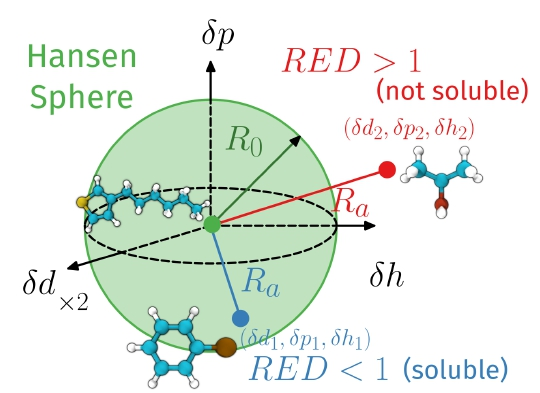

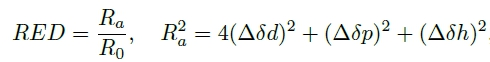

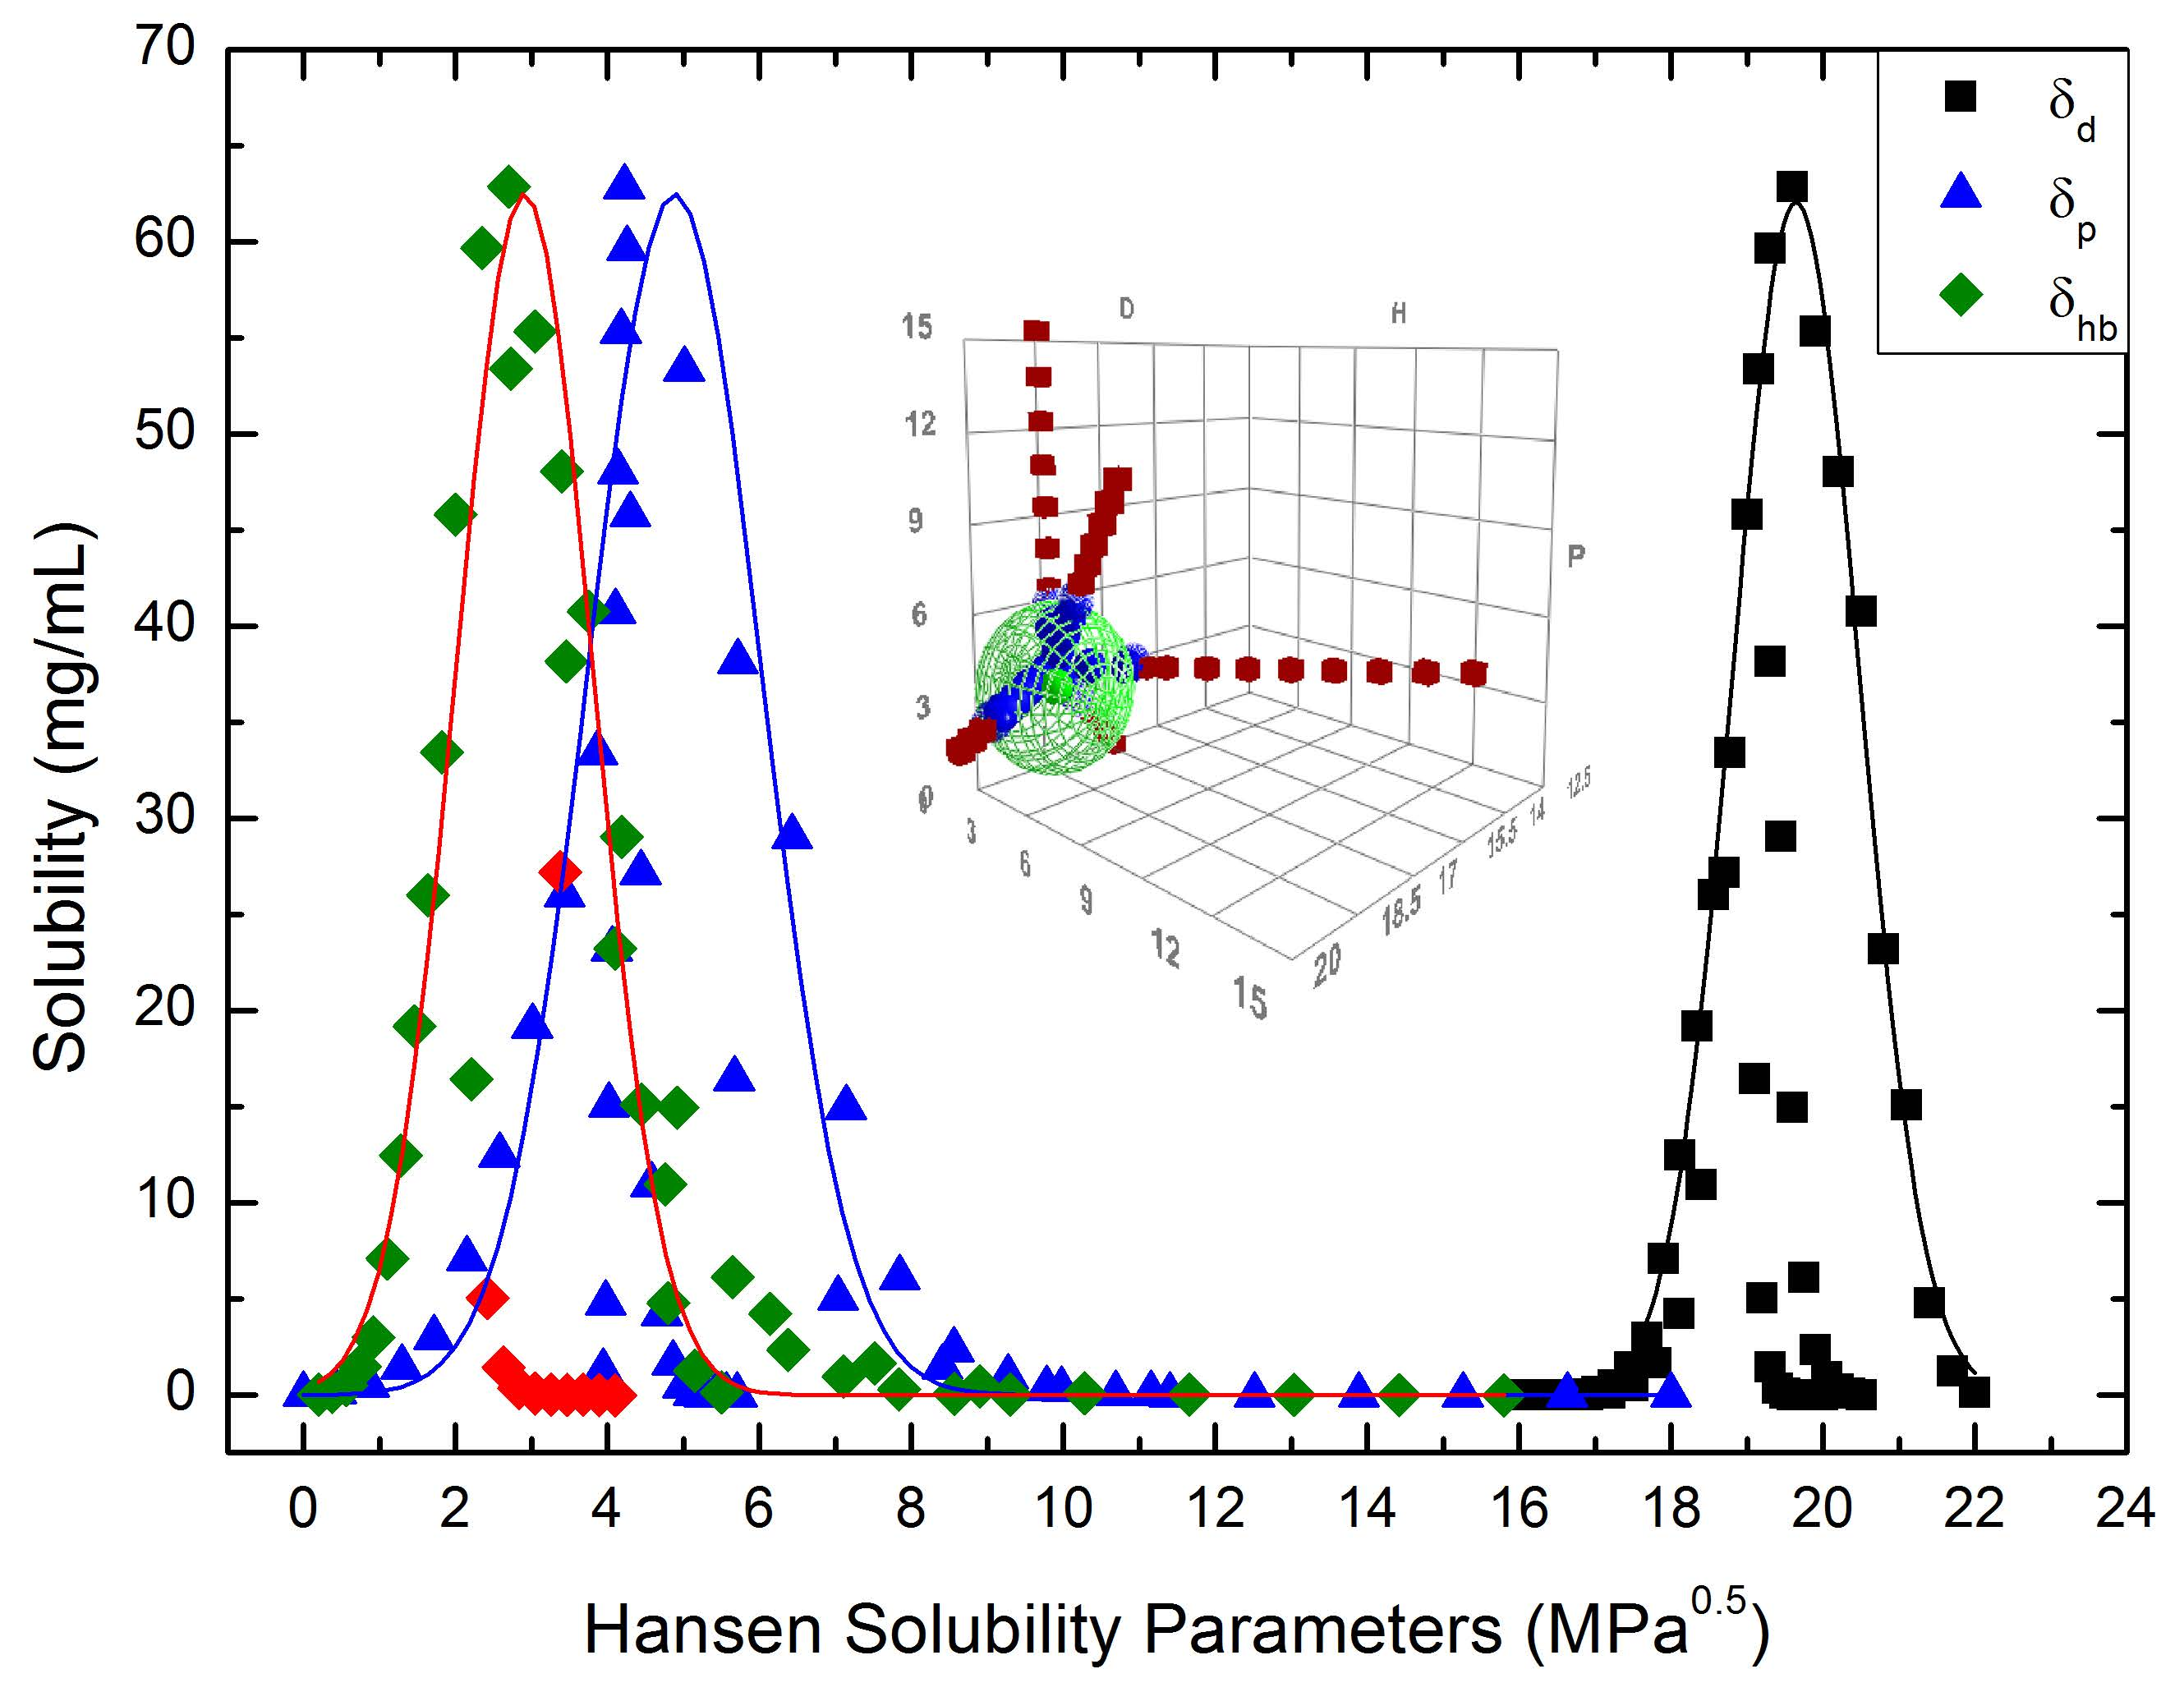

- Ra is the Euclidean distance in Hansen space 
- R0 the interaction radius, a value experimentally measured for the substance being dissolved. 

- RED < 1 there is high likelihood of both compounds to mix
- RED > 1 they are unlikely to mix. 

Intuitively RED captures the notion that the compound in Hansen space has to be contained in the Hasen sphere of the solute.

# ② Fetch solubility parameters from gpHSP

#1.1- Download HSP datasets

- https://github.com/aspuru-guzik-group/gpHSP

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google 雲端硬碟 (andrewhuang723@gmail.com)/adventures/'
solubility = groot_dir + "Solubility parameters/"

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    groot_dir = 'G:/我的雲端硬碟/'
solubility = groot_dir + "HSPiP_fingerprint/"

In [2]:
def start_plot(figsize=(10, 8), style = 'whitegrid', dpi=100):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

In [3]:
import os
import requests, gdown

def fetch_gdrive_file(fid, local_save):
    remote_url = fid
    gdown.download(remote_url, local_save, quiet = False)


def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

def start_plot(figsize=(10, 8), style = 'whitegrid', dpi=120):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

In [4]:
github_dataset = "https://raw.githubusercontent.com/aspuru-guzik-group/gpHSP/master/data/%s.csv"

p_files = ["HSPiP", "Solvents_exp", "Polymers_exp"]

HSP_data = lambda x: github_dataset % x 

for i in p_files:
    url = HSP_data(i)
    dled = fetch_file_via_requests(url, solubility)
    localname = dled.split("/")[-1]
    print(f"{localname:s} fetched")

gdb_datasets = 'https://raw.githubusercontent.com/Jay-Chang810/Properties_prediction/master/DataPool/GDB-9/GDB9Quantum.csv'
dled_1 = fetch_file_via_requests(gdb_datasets, solubility)
l_name = dled_1.split('/')[-1]
print(f'{l_name:s} fetched')

HSPiP.csv fetched
Solvents_exp.csv fetched
Polymers_exp.csv fetched
GDB9Quantum.csv fetched


In [5]:
dres = os.path.join(solubility, p_files[0] + ".csv")
solvents = os.path.join(solubility, p_files[1] + ".csv")
polymer = os.path.join(solubility, p_files[2] + ".csv")
gdb = os.path.join(solubility, 'GDB9Quantum.csv')

##(1) HSPiP.csv
- The Hansen Solubility Parameters in Practice (HSPiP) set contains around 8,000 organic chemicals common to a wide array of contexts
- which is augmented with a drug-like set contains 64 drug-like molecules

###This dataset is done by one of the following two methods
- Use the HSPiP software to transfer the related solvents to the Hansen space and to separate the data into soluble and non-soluble regions, which allows the user to create a solubility sphere. New coordinates are determined in reference to other known solvents and their HSP
- Use the Gaussian behavior of solubility in the Hansen space to extract the HSP directly from solubility data.

In [6]:
import pandas as pd
import numpy as np

HSPiP = pd.read_csv(dres, index_col=None)
HSPiP.head()

Chemical       CAS           smiles HSPiP_indx  good_smiles  \
0  Acetaldehyde   75-07-0             CC=O          0         True   
1  Acetaldoxime  107-29-9          C/C=N/O          1         True   
2     Acetamide   60-35-5          CC(N)=O          2         True   
3   Acetanilide  103-84-4  CC(=O)Nc1ccccc1          3         True   
4   Acetic Acid   64-19-7          CC(=O)O          4         True   

   single_frag  duplicated  sanity    label  organic  ...     Hbd  Volume  \
0         True        True    True  hspip_0     True  ...  0.0000  0.0641   
1         True        True    True  hspip_1     True  ...  3.9919  0.0806   
2         True        True    True  hspip_2     True  ...  1.4629  0.0802   
3         True        True    True  hspip_3     True  ...  1.4190  0.1741   
4         True        True    True  hspip_4     True  ...  4.9479  0.0756   

   sigma_mom_0  sigma_mom_1 sigma_mom_2  sigma_mom_3  sigma_mom_4 sigma_mom_5  \
0            0         33.0   18.400000         30.6         30.1        39.1   
1            0         61.4   -9.251615        122.0        -62.6       324.0   
2            0         73.0   20.900000        117.0         55.5       221.0   
3            0         71.4   13.700000         87.4         24.6       158.0   
4            0         79.2  -12.800000        153.0       -110.0       411.0   

   sigma_norm                                      sigma_profile  
0   22.203331  [  0.00000000e+00   0.00000000e+00   0.0000000...  
1   21.885302  [ 0.          0.          0.          0.      ...  
2   19.349175  [ 0.          0.          0.          0.      ...  
3   40.872215  [ 0.          0.          0.          0.      ...  
4   19.380647  [ 0.          0.          0.          0.      ...  

[5 rows x 35 columns]

In [7]:
HSPiP[HSPiP['homo'].str.contains('True')]
#which is Chemical '3-Butoxybutanol'

Chemical   CAS                                             smiles  \
117  3-Butoxybutanol  None  CC(=O)N[C@H]([C@@H](O)CC(=O)C(=O)O)[C@@H](O)[C...   

    HSPiP_indx  good_smiles  single_frag  duplicated  sanity      label  \
117        157         True         True       False    True  hspip_157   

     organic  ...      Hbd    Volume  sigma_mom_0  sigma_mom_1 sigma_mom_2  \
117     True  ...  11.3834  309.2712            0        240.0       -20.4   

     sigma_mom_3  sigma_mom_4 sigma_mom_5  sigma_norm  \
117        417.0       -172.0       978.0   54.652574   

                                         sigma_profile  
117  [  0.00000000e+00   0.00000000e+00   0.0000000...  

[1 rows x 35 columns]

In [8]:
import pandas as pd
import numpy as np
from keras import backend as K
from keras.models import Model, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

ModuleNotFoundError: ignored

In [ ]:
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

def simple_ols(xvec, yvec, hasconst=True):
    if hasconst is True:
        Xadd = sm.add_constant(xvec)
    else:
        Xadd = xvec
    model = sm.OLS(yvec, Xadd).fit()
    return model

### Deal with overlap datasets

In [10]:
prop_name = 'homo'
gdb_prop_name = 'HOMO (Ha)'

if prop_name == 'homo':
    string = HSPiP[HSPiP['homo'] == 'True']
    missing_ = string['lumo'].values - string['gap'].values
    HSPiP['homo'].replace(['True'], missing_, inplace=True)
    HSPiP['homo'] = HSPiP['homo'].astype(np.float)

df_smiles_50 = HSPiP[HSPiP['smiles'].str.len() < 50]
print('SMILES with length < 50 : %s molecules' % len(df_smiles_50))

SMILES with length < 50 : 8627 molecules


C:\Users\wonglab\AppData\Local\Temp/ipykernel_10088/1755905314.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  HSPiP['homo'] = HSPiP['homo'].astype(np.float)


In [ ]:
prop_name = 'homo'
gdb_prop_name = 'HOMO (Ha)'
gdb_df = pd.read_csv(gdb)
overlap = df_smiles_50[['Chemical', 'smiles', prop_name]].copy()
overlap['HSPiP Index'] = overlap.index
overlap_1 = overlap.merge(gdb_df[['SMILES', 'Index', gdb_prop_name]], 
                          left_on='smiles', right_on='SMILES')
if gdb_prop_name == 'LUMO (Ha)' or 'HOMO (Ha)':
    overlap_1[gdb_prop_name[:-5]] = overlap_1[gdb_prop_name] * 27.21138386
overlap_1.drop('SMILES', axis=1)
print('%s molecules in HSPiP and GDB9 datasets' % len(overlap_1))

775 molecules in HSPiP and GDB9 datasets


In [ ]:
gdb_df[gdb_df['SMILES'] == 'CCCCC(CC)CO']

Index  Rotaional A  Rotational B  Rotational C  Dipole Moment  \
122135  gdb 122136      2.91221       0.61656       0.53857         1.4945   

        Isotropic Polarizability  HOMO (Ha)  LUMO (Ha)  HOMOLUMO Gap (Ha)  \
122135                     93.72    -0.2627     0.0764             0.3392   

        Electronic Spatial Extent  Zero point vibrational energy  \
122135                  2185.9654                       0.249951   

        Internal energy at 0 K  Internal energy at 298.15 K  \
122135              -390.70048                  -390.688234   

        Enthalpy at 298.15 K  Free energy at 298.15 K  \
122135            -390.68729              -390.739266   

        Heat capacity at 298.15 K       SMILES SMILES from B3LYP relaxation  
122135                     43.409  CCCCC(CC)CO             CCCC[C@@H](CC)CO

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


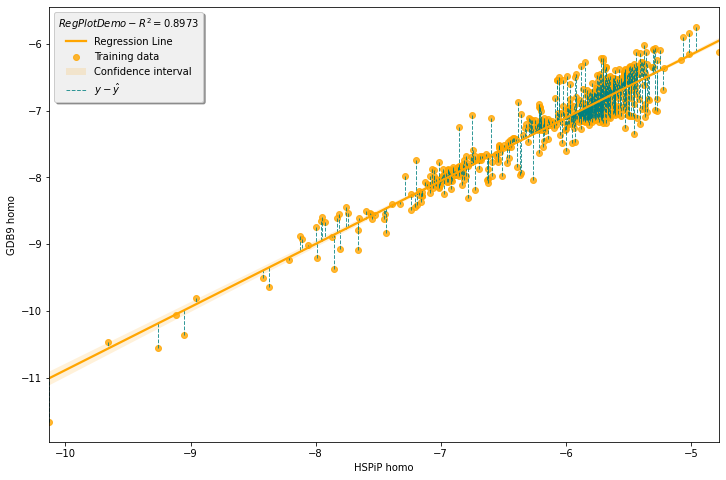

In [ ]:
hsp_df = overlap_1[prop_name]
gdb_df = overlap_1[gdb_prop_name[:-5]]
ols = simple_ols(np.asarray(hsp_df), np.asarray(gdb_df))

fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(hsp_df, gdb_df, color='orange', ax=ax)
ax.vlines(hsp_df, gdb_df, ols.fittedvalues, color='teal', ls='--', lw=1, alpha=0.8)
ax.set_xlabel('HSPiP %s' % prop_name)
ax.set_ylabel('GDB9 %s' % prop_name)
ax.legend(["Regression Line", "Training data", "Confidence interval", r"$y - \hat y$"],
          loc="upper left", frameon=True, shadow=True, title=r"$RegPlot Demo - R^2=%.4f$" % ols.rsquared,
          facecolor="#f0f0f0")

### 測試HSPIP資料

In [ ]:
df_smiles_50 = HSPiP[HSPiP['smiles'].str.len() < 50]
print('SMILES with length < 50 : %s molecules' % len(df_smiles_50))

SMILES with length < 50 : 8627 molecules


In [ ]:
zero_cols = ['good_smiles', 'single_frag', 'charge', 'n_cores', 'organic',
        'sanity', 'sigma_mom_0']
df_smiles_50[zero_cols]

KeyboardInterrupt: ignored

**經由countplot發現，每個zero_cols的features皆呈現嚴重的data inbalance** 

In [ ]:
colors = ['teal', 'brown', 'darkorange', 'lavender',  'sienna', 'azure', 'purple',
           'navy', 'lightblue', 'pink']

counts = lambda df, feature: df[feature].value_counts()

var_analysis = lambda df, feature, y: \
    df[[feature, y]].groupby(feature, as_index=False).mean().sort_values(by=y, ascending = False)

def bar_count(df, feature, figsize = (10, 10), 
        dpi = 100, ax = None, fontsize=12):
    if ax is None:
        fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    else:
        fig = ax.figure   
    # k = df[feature].value_counts()
    k = df.groupby([feature]).size()
    q = 100*(k/len(df))

    ax.bar([str(e) for e in k.index] if type(k.index[0]) is np.int64 else k.index, 
           k, color = colors, alpha = 0.7)
    # ticks將label變成整數
    
    for j, (i, p) in enumerate(zip(k.index, ax.patches)):
        # ypos = max(k[i] - 75, 25)
        ypos = max(p.get_height() - 60, 65)
        ax.text(j, ypos , '%d' % k[i], fontsize = fontsize, ha = 'center')
        ax.text(j, ypos - 48, '%.1f%%' % q[i], fontsize = fontsize, 
            ha = 'center')
     
    ax.set_ylabel('Counts (#)')
    ax.set_xlabel(feature)
    return ax

sns.set(style='darkgrid')
bar_count(df_smiles_50, 'n_cores', figsize = (5,3))

In [ ]:
fig,ax = plt.subplots(1, 7, figsize=(15, 10), dpi=200)
for i, p in enumerate(zero_cols):
    bar_count(df_smiles_50, p, figsize=(5, 3), ax=ax[i], fontsize=10)

<font color='yellow'>correlation matrix找出feature間的關聯性</font>

In [ ]:
df_smiles_50.drop(zero_cols, axis=1, inplace=True)
df_corr = df_smiles_50.corr()
fig,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

In [ ]:
sns.distplot(df_smiles_50.sigma_norm)

### $\sigma-profile$

In [11]:
sigma_df = df_smiles_50[['Chemical', 'smiles', 'sigma_mom_0', 'sigma_mom_1', 'sigma_mom_2', 'sigma_mom_3',
          'sigma_mom_4', 'sigma_mom_5', 'sigma_norm', 'sigma_profile']]
sigma_df.tail()

Chemical                                        smiles  sigma_mom_0  \
8844  Impurity A1                        Clc1cccc(N2CCNCC2)c1Cl            0   
8845  Impurity A3                     O=C1CCc2ccc(OCCCCCl)cc2N1            0   
8846  Impurity A4                     O=C1CCc2ccc(OCCCCBr)cc2N1            0   
8847  Impurity A5                           O=C1CCc2ccc(O)cc2N1            0   
8848  Impurity A6  O=C1CCc2ccc(OCCCCOc3ccc4c(c3)NC(=O)CC4)cc2N1            0   

      sigma_mom_1  sigma_mom_2  sigma_mom_3  sigma_mom_4  sigma_mom_5  \
8844         47.8         17.8         55.9         69.5        144.0   
8845         91.5         18.3         95.0         23.0        158.0   
8846         96.3         20.9         97.8         28.9        160.0   
8847        103.0        -13.0        162.0        -76.9        355.0   
8848        150.0         36.0        181.0         51.2        317.0   

      sigma_norm                                      sigma_profile  
8844   61.093721  [ 0.          0.          0.          0.      ...  
8845   67.634057  [ 0.          0.          0.          0.      ...  
8846   69.719721  [ 0.          0.          0.          0.      ...  
8847   38.294541  [ 0.          0.          0.          0.      ...  
8848   94.154278  [ 0.          0.          0.          0.      ...

In [12]:
def extract(data, prop_name, ymax=None, ymin=None):
    if ymax is None:
        ymax = data[prop_name].mean() + 3 * data[prop_name].std()
    if ymin is None:
        ymin = data[prop_name].mean() - 3 * data[prop_name].std()

    new_data = data.loc[(data[prop_name] <= ymax) & (data[prop_name]>= ymin)]
    return new_data

In [13]:
# sns.distplot(sigma_df['sigma_norm'])
new_sig_norm = extract(sigma_df, 'sigma_norm')
new_sig_mom_1 = extract(sigma_df, 'sigma_mom_1')
new_sig_mom_2 = extract(sigma_df, 'sigma_mom_2')
new_sig_mom_3 = extract(sigma_df, 'sigma_mom_3')
new_sig_mom_4 = extract(sigma_df, 'sigma_mom_4')
new_sig_mom_5 = extract(sigma_df, 'sigma_mom_5')

In [14]:
a = set(new_sig_norm.index) & set(new_sig_mom_1.index) & set(new_sig_mom_2.index) &\
   set(new_sig_mom_3.index) & set(new_sig_mom_4.index) & set(new_sig_mom_5.index)
idx_list = list(a)

In [21]:
drop_list = list(set(df_smiles_50.index.to_list()).difference(a))
np.savetxt(os.path.join('C:/Users/wonglab/Properties_prediction-master/DataPool/HSPiP_fingerprint', "sigma_list.csv"), 
           idx_list, delimiter=',', fmt='%d')

In [ ]:
import csv
with open('')

In [ ]:
new_sigma_df = sigma_df.loc[idx_list]
new_sigma_df.head()

Chemical           smiles  sigma_mom_0  sigma_mom_1  sigma_mom_2  \
0  Acetaldehyde             CC=O            0         33.0    18.400000   
1  Acetaldoxime          C/C=N/O            0         61.4    -9.251615   
2     Acetamide          CC(N)=O            0         73.0    20.900000   
3   Acetanilide  CC(=O)Nc1ccccc1            0         71.4    13.700000   
4   Acetic Acid          CC(=O)O            0         79.2   -12.800000   

   sigma_mom_3  sigma_mom_4  sigma_mom_5  sigma_norm  \
0         30.6         30.1         39.1   22.203331   
1        122.0        -62.6        324.0   21.885302   
2        117.0         55.5        221.0   19.349175   
3         87.4         24.6        158.0   40.872215   
4        153.0       -110.0        411.0   19.380647   

                                       sigma_profile  
0  [  0.00000000e+00   0.00000000e+00   0.0000000...  
1  [ 0.          0.          0.          0.      ...  
2  [ 0.          0.          0.          0.      ...  
3  [ 0.          0.          0.          0.      ...  
4  [ 0.          0.          0.          0.      ...

In [ ]:
new_sigma_df[new_sigma_df.columns.to_list()[1:]].describe()

sigma_mom_0  sigma_mom_1  sigma_mom_2  sigma_mom_3  sigma_mom_4  \
count       8185.0  8185.000000  8185.000000  8185.000000  8185.000000   
mean           0.0    46.392475    10.612421    48.316419    13.303729   
std            0.0    24.738633    16.970718    42.487608    46.293418   
min            0.0     2.589345   -50.200000     0.220871  -198.000000   
25%            0.0    29.100000     0.353281    14.200000    -0.324751   
50%            0.0    43.700000     8.743570    40.100000    10.600000   
75%            0.0    59.100000    24.000000    64.600000    41.600000   
max            0.0   143.000000    69.800000   238.000000   207.000000   

       sigma_mom_5   sigma_norm  
count  8185.000000  8185.000000  
mean     88.543043    59.995609  
std     107.510870    20.887322  
min       0.017433     8.481538  
25%      11.200000    44.677231  
50%      53.600000    57.472669  
75%     118.000000    72.791119  
max     626.000000   137.519804

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sigma_mom_1', ylabel='Density'>

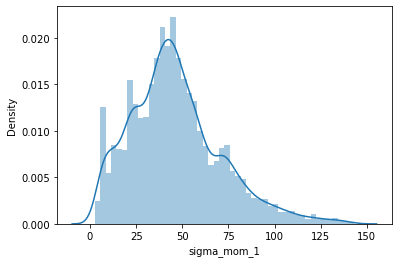

In [ ]:
sns.distplot(new_sigma_df['sigma_mom_1'])

Convert raw sigma-profile (string type) into array

In [ ]:
def str_sig_to_array(str_sig):
    lines = str_sig[1: -1].split('\n')
    float_list = []
    for ls in lines:
        fan = ls.split('  ')
        for ele in fan:
            try:
                float_list.append(float(ele))
            except:
                pass
    return np.array(float_list)

In [ ]:
new_sigma_df['sigma_profile'] = new_sigma_df['sigma_profile'].apply(str_sig_to_array)

$[\sigma] = e/A^2$

### Shared molecules: $\sigma-profile$

In [ ]:
vtdf = pd.read_csv(os.path.join(solubility, 'sigma.csv'), header=None)
mol_df = pd.read_csv(os.path.join(solubility, 'compound.csv'), header=None, index_col=None)
mol_df.shape, vtdf.shape

((42296, 1), (42296, 51))

In [ ]:
jdf = pd.concat([mol_df, vtdf], axis=1)
jdf.columns = ["smiles"] + list(range(vtdf.shape[-1]))

In [ ]:
shared_df = df_smiles_50.merge(jdf, how='inner', on='smiles')

In [ ]:
vt_sigma = shared_df[list(range(vtdf.shape[-1]))].values
hsp_sigma = shared_df['sigma_profile']

np.linalg.norm(vt_sigma[-2]), shared_df['sigma_norm'].iloc[-2]

(44.57894448279069, 37.0805826410535)

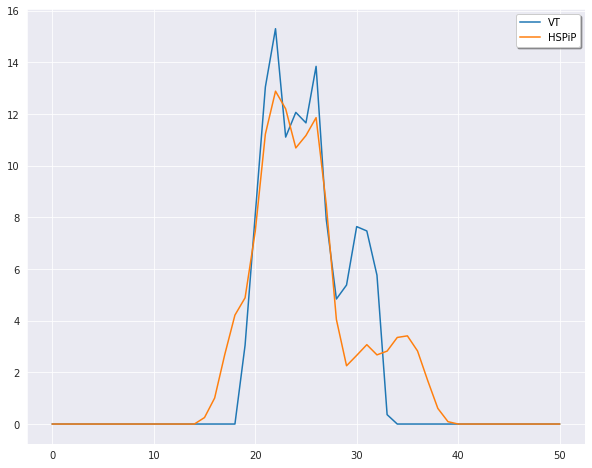

In [ ]:
def raw_profile(mol):
    ax = start_plot(style='darkgrid')
    sns.lineplot(data=vt_sigma[mol], ax=ax, label='VT')
    sns.lineplot(data=shared_df['sigma_norm'].iloc[mol] * 
                shared_df['sigma_profile'].apply(str_sig_to_array).iloc[mol][5:-5], 
                ax=ax, label='HSPiP')
    ax.legend(shadow=True)
raw_profile(500)

In [ ]:
sp = shared_df['sigma_profile'].apply(str_sig_to_array)
raw_sigma = shared_df['sigma_norm'] * sp 
r = shared_df[list(range(50))].values
X = np.array([i for i in raw_sigma])
X.shape

(810, 61)

### VT database

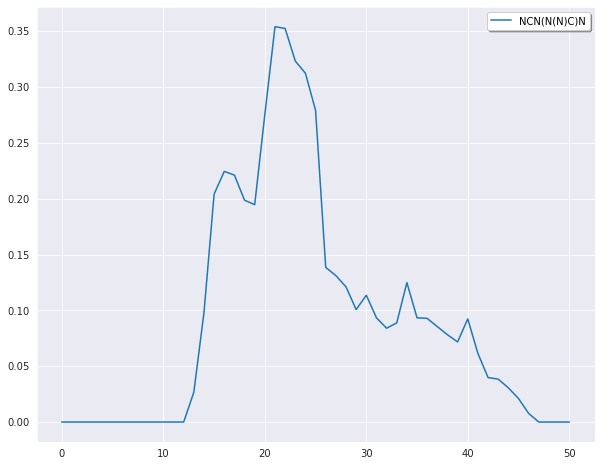

In [ ]:
norm_vt = [np.linalg.norm(i) for i in vtdf.values]
vt_arr = vtdf.values / np.asarray(norm_vt).reshape(-1,1)
ax = start_plot(style='darkgrid')
sns.lineplot(data=vt_arr[10000], ax=ax, label=mol_df.iloc[10000, 0])
ax.legend(shadow=True)

In [ ]:
sigma_segments = np.linspace(-0.025, 0.025, num=51)
simple_polynomic_function = lambda x, i: x**i

def manual_moment(x, moment):
    ## sigma segments inetgrated
    order = moment + 1
    ## consider unit (nm -> angstron)
    polynomial_segments = simple_polynomic_function(sigma_segments, order) * (100 ** order)
    cumsum = [np.sum(x[:i] * polynomial_segments[:i]) for i in range(51)]
    scaler = MinMaxScaler()
    norm_cumsum = scaler.fit_transform(np.array(cumsum).reshape(-1, 1)).squeeze()
    return norm_cumsum

deleting outliers by $\sigma-moment, \sigma-norm$

In [ ]:
vt_mom_df = pd.DataFrame()
vt_mom_df['sigma_norm'] = norm_vt
for i in range(5):
    f_sigma_i = simple_polynomic_function(sigma_segments, i=i+1)

    vt_mom_i = [np.sum(vt_arr[mol] * f_sigma_i * (100 ** (i+1))) for mol in range(len(new_vtdf))]
    vt_mom_df['sigma_mom_%s' % (i+1)] = vt_mom_i

In [ ]:
new_vt_norm = extract(vt_mom_df, 'sigma_norm')
new_vt_mom_1 = extract(vt_mom_df, 'sigma_mom_1')
new_vt_mom_2 = extract(vt_mom_df, 'sigma_mom_2')
new_vt_mom_3 = extract(vt_mom_df, 'sigma_mom_3')
new_vt_mom_4 = extract(vt_mom_df, 'sigma_mom_4')
new_vt_mom_5 = extract(vt_mom_df, 'sigma_mom_5')

In [ ]:
a = set(new_vt_norm.index) & set(new_vt_mom_1.index) & set(new_vt_mom_2.index) &\
   set(new_vt_mom_3.index) & set(new_vt_mom_4.index) & set(new_vt_mom_5.index)
idx_list = list(a)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

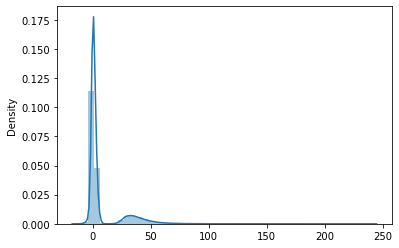

In [ ]:
sns.distplot(new_vt_mom_4)

$\sigma-moment$ profile calculation

In [ ]:
%%time
vt_moment_1_integral = [manual_moment(vt_arr[i], moment=1) for i in range(len(vt_arr))]
vt_moment_2_integral = [manual_moment(vt_arr[i], moment=2) for i in range(len(vt_arr))]
vt_moment_3_integral = [manual_moment(vt_arr[i], moment=3) for i in range(len(vt_arr))]
vt_moment_4_integral = [manual_moment(vt_arr[i], moment=4) for i in range(len(vt_arr))]
vt_moment_5_integral = [manual_moment(vt_arr[i], moment=5) for i in range(len(vt_arr))]

minmax = lambda x: (x - min(x)) / (max(x) - min(x))
vt_moment_1_diff = [minmax(np.gradient(i)) for i in vt_moment_1_integral]
vt_moment_2_diff = [minmax(np.gradient(i)) for i in vt_moment_2_integral]
vt_moment_3_diff = [minmax(np.gradient(i)) for i in vt_moment_3_integral]
vt_moment_4_diff = [minmax(np.gradient(i)) for i in vt_moment_4_integral]
vt_moment_5_diff = [minmax(np.gradient(i)) for i in vt_moment_5_integral]

Wall time: 1min 38s


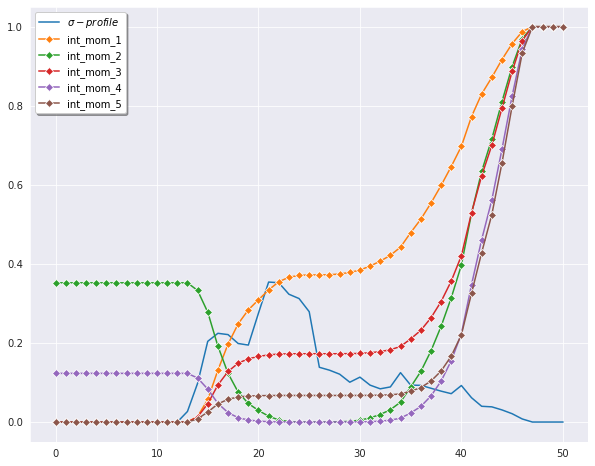

In [ ]:
ax=start_plot(style='darkgrid')
mol=10000
sns.lineplot(data=vt_arr[mol], ax=ax, label='$\sigma-profile$')
sns.lineplot(data=vt_moment_1_integral[mol], ax=ax, label='int_mom_1', marker='D')
sns.lineplot(data=vt_moment_2_integral[mol], ax=ax, label='int_mom_2',marker='D')
sns.lineplot(data=vt_moment_3_integral[mol], ax=ax, label='int_mom_3',marker='D')
sns.lineplot(data=vt_moment_4_integral[mol], ax=ax, label='int_mom_4',marker='D')
sns.lineplot(data=vt_moment_5_integral[mol], ax=ax, label='int_mom_5',marker='D')
ax.legend(shadow=True)

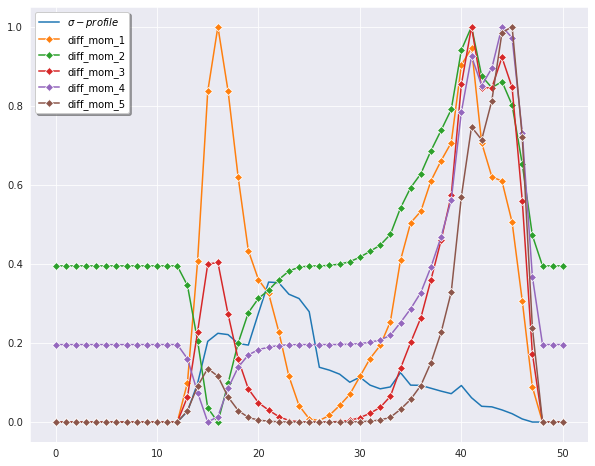

In [ ]:
ax=start_plot(style='darkgrid')
mol=10000
sns.lineplot(data=vt_arr[mol], ax=ax, label='$\sigma-profile$')
sns.lineplot(data=vt_moment_1_diff[mol], ax=ax, label='diff_mom_1', marker='D')
sns.lineplot(data=vt_moment_2_diff[mol], ax=ax, label='diff_mom_2',marker='D')
sns.lineplot(data=vt_moment_3_diff[mol], ax=ax, label='diff_mom_3',marker='D')
sns.lineplot(data=vt_moment_4_diff[mol], ax=ax, label='diff_mom_4',marker='D')
sns.lineplot(data=vt_moment_5_diff[mol], ax=ax, label='diff_mom_5',marker='D')
ax.legend(shadow=True)

Data saving

In [ ]:
new_vtdf = pd.DataFrame()
new_vtdf['smiles'] = mol_df[0]
new_vtdf['sigma_profile'] = [i for i in vt_arr]
new_vtdf['sigma_norm'] = norm_vt
new_vtdf['int_mom_1'] = vt_moment_1_integral
new_vtdf['int_mom_2'] = vt_moment_2_integral
new_vtdf['int_mom_3'] = vt_moment_3_integral
new_vtdf['int_mom_4'] = vt_moment_4_integral
new_vtdf['int_mom_5'] = vt_moment_5_integral

new_vtdf['diff_mom_1'] = vt_moment_1_diff
new_vtdf['diff_mom_2'] = vt_moment_2_diff
new_vtdf['diff_mom_3'] = vt_moment_3_diff
new_vtdf['diff_mom_4'] = vt_moment_4_diff
new_vtdf['diff_mom_5'] = vt_moment_5_diff

In [ ]:
new_vtdf = new_vtdf.loc[idx_list]

In [ ]:
save_data_dir = 'C:/Users/wonglab/Bigfile/Properties_prediction-master/VT_sigma_profile/data'
new_vtdf.tail()

smiles  \
42290          OCc1ccc(cc1)C   
42291              CC1CCC=C1   
42292  CCCOC(=O)C=CC(=O)OCCC   
42293          CCC(OC(=O)C)C   
42294                CC(=C)C   

                                           sigma_profile  sigma_norm  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   41.945931   
42291  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   43.291227   
42292  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   68.569613   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   48.830459   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   32.718320   

                                               int_mom_1  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42291  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42292  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               int_mom_2  \
42290  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42291  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42292  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42293  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42294  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

                                               int_mom_3  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42291  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42292  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               int_mom_4  \
42290  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42291  [0.9999999999999999, 0.9999999999999999, 0.999...   
42292  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42293  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
42294  [0.9999999999999999, 0.9999999999999999, 0.999...   

                                               int_mom_5  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42291  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42292  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              diff_mom_1  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42291  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42292  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              diff_mom_2  \
42290  [0.9094643013667633, 0.9094643013667633, 0.909...   
42291  [0.9912058958535424, 0.9912058958535424, 0.991...   
42292  [0.885025857546183, 0.885025857546183, 0.88502...   
42293  [0.9032633771645006, 0.9032633771645006, 0.903...   
42294  [0.9950847529067608, 0.9950847529067608, 0.995...   

                                              diff_mom_3  \
42290  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42291  [4.52762438562073e-16, 4.52762438562073e-16, 4...   
42292  [3.802878488742551e-16, 3.802878488742551e-16,...   
42293  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42294  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              diff_mom_4  \
42290  [0.9349966770970516, 0.9349966770970516, 0.934...   
42291  [0.9980708790265319, 0.9980708790265319, 0.998...   
42292  [0.9427543469161248, 0.9427543469161248, 0.942...   
42293  [0.9324471488038745, 0.9324471488038745, 0.932...   
42294  [0.999335873559858, 0.999335873559858, 0.99933...   

                                              diff_mom_5  
42290  [3.2345032328179917e-16, 3.2345032328179917e-1...  
42291  [4.3038425728669076e-1

In [ ]:
%%time
new_vtdf.to_csv(os.path.join(save_data_dir, 'sigma_data.csv'))

Wall time: 3min


In [ ]:
os.getcwd()

'C:\\Users\\wonglab\\Bigfile\\Properties_prediction-master'

In [ ]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'VT_sigma_profile/results_single_sigma_profile/testing_sigma_profile/testing.csv'))
test_df.describe()

Unnamed: 0           R2          MAE
count  4056.000000  4056.000000  4056.000000
mean   2027.500000     0.927440     0.015947
std    1171.010675     0.091999     0.006855
min       0.000000    -0.768452     0.002567
25%    1013.750000     0.913586     0.011625
50%    2027.500000     0.947290     0.014935
75%    3041.250000     0.969623     0.018836
max    4055.000000     0.997309     0.083565

### $\sigma-moment$ calculation

<font color='orange'>$M_{i}^{X} = \int p^X(\sigma)f_i(\sigma)d\sigma$

$f(\sigma) = \sigma^{i}$ <font>

$M_{i}^{X}$ is the $i^{th} moment$ for the $X$ molecule 

所以要先知道$\sigma$的range(x-axis)

善用linear regression 的power

由於只知道$\sigma-profile$的61-dim的unit vector, rescale by $\sigma-norm$

**need to rescale before moment generated function**


<font color='orange'>$p^*(\hat\sigma) = \frac{p(\hat\sigma)}{||p(\hat\sigma)||}$

$PDF: \\ M_{i}^{X} = \int p^X(\sigma)f_i(\sigma)d\sigma $ <font>

$\rightarrow \int p(\hat\sigma)dF(\hat\sigma) = p(\hat\sigma)F(\hat\sigma) - \int F(\hat\sigma)dp(\hat\sigma) \\ \rightarrow 
\int_0^{60}p(\hat\sigma)dF(\hat\sigma) = p(\hat\sigma)F(\hat\sigma)|_{\hat\sigma=0}^{\hat\sigma=60} - \int_{p(\hat\sigma)=0}^{p(\hat\sigma)=60}F(p^{-1}(\hat\sigma))dp(\hat\sigma) \\ = m(\hat\sigma^{i + 1})^T p(\hat\sigma) + b$

$p_j(\sigma)$ is known

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

raw_sigma = new_sigma_df['sigma_norm'] * new_sigma_df['sigma_profile'] 
# raw_sigma = sigma_df['sigma_profile']

X = np.array([i for i in raw_sigma])
mom_1 = new_sigma_df['sigma_mom_1'].values
mom_2 = new_sigma_df['sigma_mom_2'].values
mom_3 = new_sigma_df['sigma_mom_3'].values
mom_4 = new_sigma_df['sigma_mom_4'].values
mom_5 = new_sigma_df['sigma_mom_5'].values

lin_1 = LinearRegression(fit_intercept=False)
lin_1.fit(X, mom_1)

lin_2 = LinearRegression(fit_intercept=False)
lin_2.fit(X, mom_2)

lin_3 = LinearRegression(fit_intercept=False)
lin_3.fit(X, mom_3)

lin_4 = LinearRegression(fit_intercept=False)
lin_4.fit(X, mom_4)

lin_5 = LinearRegression(fit_intercept=False)
lin_5.fit(X, mom_5)

mom_1_hat = lin_1.predict(X)
mom_2_hat = lin_2.predict(X)
mom_3_hat = lin_3.predict(X)
mom_4_hat = lin_4.predict(X)
mom_5_hat = lin_5.predict(X)

r2_score(mom_2, mom_2_hat), r2_score(mom_3, mom_3_hat), r2_score(mom_4, mom_4_hat), r2_score(mom_5, mom_5_hat)

(0.999997948391974, 0.9999937770639651, 0.9999965103949555, 0.9999966846901186)

#### 驗證 moment 算法

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


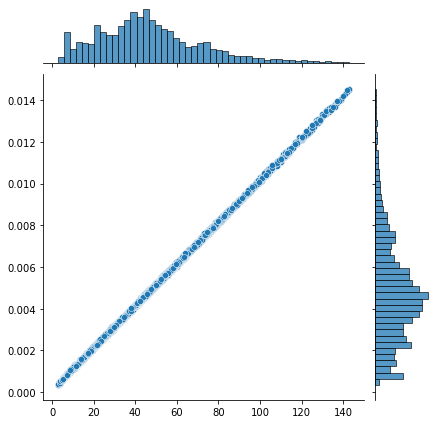

In [ ]:
sigma_segments = np.linspace(-0.03, 0.03, num=61)
simple_polynomic_function = lambda x, i: x**i

f_sigma_1 = simple_polynomic_function(sigma_segments, i=2)

h = [np.sum(X[mol] * f_sigma_1) for mol in range(len(new_sigma_df))]
sns.jointplot(mom_1, h)

#### reconstruct $\sigma-moment$

In [ ]:
def manual_moment(x, moment):
    ## sigma segments inetgrated
    order = moment + 1
    ## consider unit (nm -> angstron)
    polynomial_segments = simple_polynomic_function(sigma_segments, order) * (100 ** order)
    cumsum = [np.sum(x[:i] * polynomial_segments[:i]) for i in range(61)]
    scaler = MinMaxScaler()
    norm_cumsum = scaler.fit_transform(np.array(cumsum).reshape(-1, 1)).squeeze()
    return norm_cumsum

In [ ]:
%%time
all_moment_1_integral = [manual_moment(X[i], moment=1) for i in range(len(X))]
all_moment_2_integral = [manual_moment(X[i], moment=2) for i in range(len(X))]
all_moment_3_integral = [manual_moment(X[i], moment=3) for i in range(len(X))]
all_moment_4_integral = [manual_moment(X[i], moment=4) for i in range(len(X))]
all_moment_5_integral = [manual_moment(X[i], moment=5) for i in range(len(X))]

Wall time: 17.4 s


In [ ]:
minmax = lambda x: (x - min(x)) / (max(x) - min(x))
all_moment_1_diff = [minmax(np.gradient(i)) for i in all_moment_1_integral]
all_moment_2_diff = [minmax(np.gradient(i)) for i in all_moment_2_integral]
all_moment_3_diff = [minmax(np.gradient(i)) for i in all_moment_3_integral]
all_moment_4_diff = [minmax(np.gradient(i)) for i in all_moment_4_integral]
all_moment_5_diff = [minmax(np.gradient(i)) for i in all_moment_5_integral]

check if there exists outliers

In [ ]:
max_min = lambda x: [min([np.min(i) for i in x]), max([np.max(i) for i in x])]
print(max_min(all_moment_1_diff))
print(max_min(all_moment_2_diff))
print(max_min(all_moment_3_diff))
print(max_min(all_moment_4_diff))
print(max_min(all_moment_5_diff))

[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]


In [ ]:
len(all_moment_1_integral)

8185

Text(0.5, 1.0, '1-Butanol\nCCCCO')

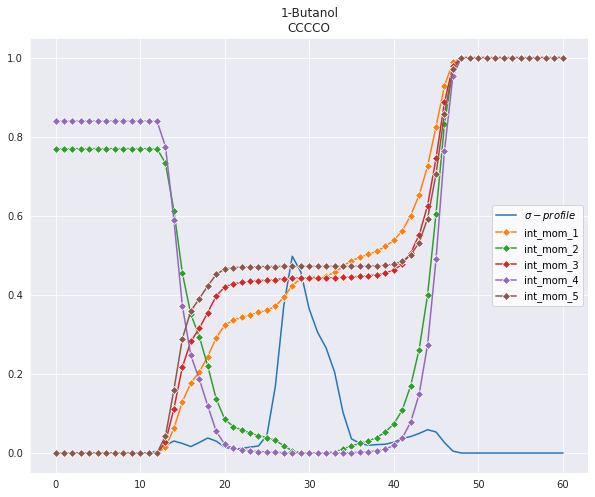

In [ ]:
m = 100
ax = start_plot(style='darkgrid')
sns.lineplot(data=new_sigma_df['sigma_profile'].iloc[m], ax=ax, label='$\sigma-profile$')
sns.lineplot(data=all_moment_1_integral[m], ax=ax, label='int_mom_1', marker='D')
# sns.lineplot(data=all_moment_1_diff[m], ax=ax, label='diff_mom_1', marker='o')
sns.lineplot(data=all_moment_2_integral[m], ax=ax, label='int_mom_2', marker='D')
# sns.lineplot(data=all_moment_2_diff[m], ax=ax, label='diff_mom_2', marker='o')
sns.lineplot(data=all_moment_3_integral[m], ax=ax, label='int_mom_3', marker='D')
# sns.lineplot(data=all_moment_3_diff[m], ax=ax, label='diff_mom_3', marker='o')
sns.lineplot(data=all_moment_4_integral[m], ax=ax, label='int_mom_4', marker='D')
# sns.lineplot(data=all_moment_4_diff[m], ax=ax, label='diff_mom_4', marker='o')
sns.lineplot(data=all_moment_5_integral[m], ax=ax, label='int_mom_5', marker='D')
# sns.lineplot(data=all_moment_5_diff[m], ax=ax, label='diff_mom_5', marker='o')
ax.set_title(new_sigma_df['Chemical'].iloc[m] + '\n' + new_sigma_df['smiles'].iloc[m])

#### Saving df to csv

In [ ]:
def str_sig_to_array_v2(str_sig):
        lines = str_sig[1: -1].split('\n ')
        float_list = []
        for ls in lines:
            fan = ls.split(' ')
            for ele in fan:
                try:
                    float_list.append(float(ele))
                except:
                    pass
        return np.array(float_list)

In [ ]:
save_data_dir = 'C:/Users/wonglab/Bigfile/Properties_prediction-master/multitask_for_sigma_profile/data'

mdf = new_sigma_df.copy()
rescale = mdf['sigma_norm'] * mdf['sigma_profile']
mdf['int_mom_1'] = all_moment_1_integral
mdf['int_mom_2'] = all_moment_2_integral
mdf['int_mom_3'] = all_moment_3_integral
mdf['int_mom_4'] = all_moment_4_integral
mdf['int_mom_5'] = all_moment_5_integral

mdf['diff_mom_1'] = all_moment_1_diff
mdf['diff_mom_2'] = all_moment_2_diff
mdf['diff_mom_3'] = all_moment_3_diff
mdf['diff_mom_4'] = all_moment_4_diff
mdf['diff_mom_5'] = all_moment_5_diff

In [ ]:
mdf.shape

(8185, 20)

In [ ]:
mdf.columns

Index(['Chemical', 'smiles', 'sigma_mom_0', 'sigma_mom_1', 'sigma_mom_2',
       'sigma_mom_3', 'sigma_mom_4', 'sigma_mom_5', 'sigma_norm',
       'sigma_profile', 'int_mom_1', 'int_mom_2', 'int_mom_3', 'int_mom_4',
       'int_mom_5', 'diff_mom_1', 'diff_mom_2', 'diff_mom_3', 'diff_mom_4',
       'diff_mom_5'],
      dtype='object')

In [ ]:
%%time
mdf.to_csv(os.path.join(save_data_dir, 'sigma_data.csv'))

Wall time: 49.1 s


### Results

In [ ]:
tdf = pd.read_csv(os.path.join(dir, 'data/sigma_data.csv'))
ndf = tdf[['Chemical', 'sigma_profile']]
ndf.to_csv(os.path.join(dir, 'data/simple_data.csv'))

In [ ]:
dir = os.path.join(os.getcwd(), 'multitask_for_sigma_profile')
profile_dir = lambda x: os.path.join(dir, '%s/testing_sigma_profile/testing.csv' % x)

In [ ]:
columns = ['results_single_sigma_profile', 'results_sigma_profile_mom_1_int_diff', 
       'results_sigma_profile_mom_2_int_diff', 'results_loss_weights_sigma_profile_mom_1_int_diff',
       'results_loss_weights_sigma_profile_mom_2_int_diff']

# df_single = pd.read_csv(profile_dir())
# df_mom_1 = pd.read_csv(profile_dir())
# df_mom_2 = pd.read_csv(profile_dir())
# df_lw_mom_1 = pd.read_csv(profile_dir())
# df_lw_mom_2 = pd.read_csv(profile_dir())

r2df = pd.DataFrame()
maedf = pd.DataFrame()
for i in columns:
    r2df[i] = pd.read_csv(profile_dir(i))['R2'].describe()
    maedf[i] = pd.read_csv(profile_dir(i))['MAE'].describe()
maedf

results_single_sigma_profile  results_sigma_profile_mom_1_int_diff  \
count                    819.000000                            819.000000   
mean                       0.008052                              0.008541   
std                        0.005601                              0.006014   
min                        0.001391                              0.000586   
25%                        0.004746                              0.004900   
50%                        0.006525                              0.007185   
75%                        0.009581                              0.010305   
max                        0.055593                              0.058970   

       results_sigma_profile_mom_2_int_diff  \
count                            819.000000   
mean                               0.008236   
std                                0.005748   
min                                0.000859   
25%                                0.004679   
50%                                0.006816   
75%                                0.010225   
max                                0.051774   

       results_loss_weights_sigma_profile_mom_1_int_diff  \
count                                         819.000000   
mean                                            0.008812   
std                                             0.006268   
min                                             0.001361   
25%                                             0.004984   
50%                                             0.007220   
75%                                             0.010859   
max                                             0.066474   

       results_loss_weights_sigma_profile_mom_2_int_diff  
count                                         819.000000  
mean                                            0.007878  
std                                             0.005870  
min                                             0.000514  
25%                                             0.004155  
50%                                             0.006244  
75%                                             0.009786  
max                                             0.061750

In [ ]:
r2df[columns[4]]

count    819.000000
mean       0.970216
std        0.058949
min        0.226359
25%        0.970272
50%        0.987033
75%        0.994253
max        0.999851
Name: results_loss_weights_sigma_profile_mom_2_int_diff, dtype: float64

##(2) Polymers_exp.csv
- The polymers set consists of 31 polymers and co-polymers with **experimentally determined** HSP used for **model validation**
- The corresponding computational set utilizes oligomers with up
to ve monomer units

In [ ]:
import numpy as np
import pandas as pd

Polymer = pd.read_csv(polymer)
Polymer.head()

label    δd    δp   δh      smiles  test         poly_label  \
0  Polyacrylonitrile-n5  20.0  15.1  7.9       CCC#N  True  Polyacrylonitrile   
1       Polyethylene-n5  16.9   0.8  2.8          CC  True       Polyethylene   
2      Polypropylene-n5  18.0   0.0  1.0         CCC  True      Polypropylene   
3        Polystyrene-n5  18.7   5.9  3.5  CCc1ccccc1  True        Polystyrene   
4  Polyvinylchloride-n5  18.8   9.2  6.3        CCCl  True  Polyvinylchloride   

   n_copies  organic  n_electrons  ...     Hbd  Volume  sigma_mom_0  \
0         5     True          110  ...  0.2196  0.3427            0   
1         5     True           70  ...  0.0000  0.2325            0   
2         5     True          100  ...  0.0000  0.3397            0   
3         5     True          210  ...  0.0000  0.7056            0   
4         5     True          100  ...  0.0000  0.3388            0   

   sigma_mom_1  sigma_mom_2  sigma_mom_3 sigma_mom_4 sigma_mom_5  sigma_norm  \
0   175.000000    26.100000   154.000000   51.400000  165.000000   66.770346   
1     6.079526     0.173827     0.301749    0.015514    0.018448   91.881756   
2     9.042064     0.279806     0.507470    0.024044    0.034376  112.132128   
3    69.700000    10.500000    20.100000    7.239795    8.328337  139.089067   
4    57.200000    -0.832630    16.400000   -0.580348    5.479739   80.135963   

                                       sigma_profile  
0  [ 0.          0.          0.          0.      ...  
1  [  0.00000000e+00   0.00000000e+00   0.0000000...  
2  [  0.00000000e+00   0.00000000e+00   0.0000000...  
3  [  0.00000000e+00   0.00000000e+00   0.0000000...  
4  [ 0.          0.          0.          0.      ...  

[5 rows x 39 columns]

In [ ]:
print(Polymer.smiles.isna().sum())
print(Polymer.poly_smiles.isna().sum())
print(len(Polymer.smiles), len(Polymer.poly_smiles))

0
0
31 31


In [ ]:
mono_smiles_50 = Polymer[Polymer['smiles'].str.len() < 50]
poly_smiles_50 = Polymer[Polymer['poly_smiles'].str.len() < 50]

poly_smiles_50.shape, mono_smiles_50.shape

((11, 39), (25, 39))

In [ ]:
mono_df = mono_smiles_50.copy()
poly_df = poly_smiles_50.copy()

def str_sig_to_array(str_sig):
    lines = str_sig[1: -1].split('\n')
    float_list = []
    for ls in lines:
        fan = ls.split('  ')
        for ele in fan:
            try:
                float_list.append(float(ele))
            except:
                pass
    return np.array(float_list)

mono_df['sigma_profile'] = mono_smiles_50['sigma_profile'].apply(str_sig_to_array)
poly_df['sigma_profile'] = poly_smiles_50['sigma_profile'].apply(str_sig_to_array)

In [ ]:
poly_smiles_50.head()

label     δd     δp    δh  \
0  Polyacrylonitrile-n5  20.00  15.10  7.90   
1       Polyethylene-n5  16.90   0.80  2.80   
2      Polypropylene-n5  18.00   0.00  1.00   
4  Polyvinylchloride-n5  18.80   9.20  6.30   
7            MDMOPPV-n1  19.06   5.62  5.28   

                                smiles   test         poly_label  n_copies  \
0                                CCC#N   True  Polyacrylonitrile         5   
1                                   CC   True       Polyethylene         5   
2                                  CCC   True      Polypropylene         5   
4                                 CCCl   True  Polyvinylchloride         5   
7  C=Cc1cc(OCC[C@@H](C)CCCC(C)C)ccc1OC  False            MDMOPPV         1   

   organic  n_electrons  ...     Hbd  Volume  sigma_mom_0  sigma_mom_1  \
0     True          110  ...  0.2196  0.3427            0   175.000000   
1     True           70  ...  0.0000  0.2325            0     6.079526   
2     True          100  ...  0.0000  0.3397            0     9.042064   
4     True          100  ...  0.0000  0.3388            0    57.200000   
7     True          118  ...  0.0006  0.4100            0    49.800000   

   sigma_mom_2  sigma_mom_3 sigma_mom_4 sigma_mom_5  sigma_norm  \
0    26.100000   154.000000   51.400000  165.000000   66.770346   
1     0.173827     0.301749    0.015514    0.018448   91.881756   
2     0.279806     0.507470    0.024044    0.034376  112.132128   
4    -0.832630    16.400000   -0.580348    5.479739   80.135963   
7    10.000000    22.200000   12.000000   17.100000  101.656771   

                                       sigma_profile  
0  [ 0.          0.          0.          0.      ...  
1  [  0.00000000e+00   0.00000000e+00   0.0000000...  
2  [  0.00000000e+00   0.00000000e+00   0.0000000...  
4  [ 0.          0.          0.          0.      ...  
7  [  0.00000000e+00   0.00000000e+00   0.0000000...  

[5 rows x 39 columns]

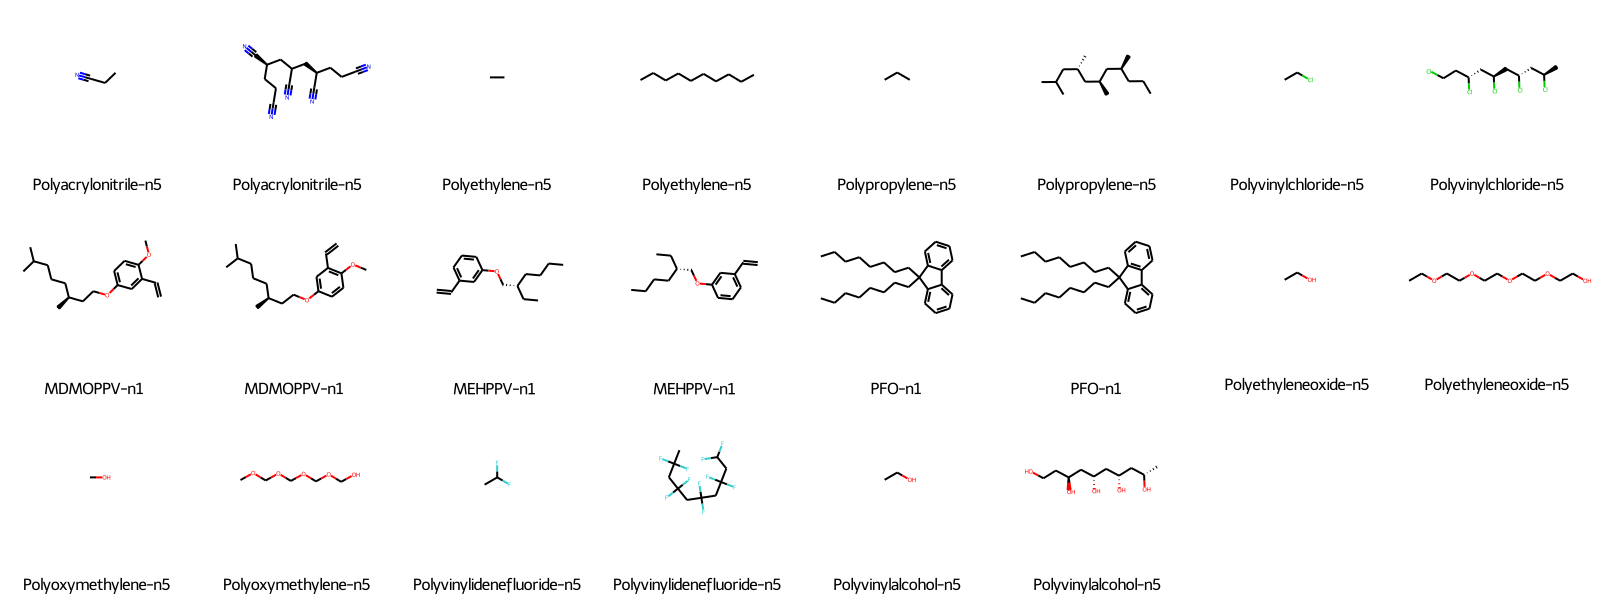

In [ ]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
import PIL.Image as image
import PIL
mono_ = poly_smiles_50['smiles'].to_list() 
poly_ = poly_smiles_50['poly_smiles'].to_list()

ff = []
l = []

for i, j, z in zip(mono_, poly_, poly_smiles_50['label'].to_list()):
    ff.append(i)
    ff.append(j)
    l.append(z)
    l.append(z)
mol = [Chem.MolFromSmiles(i) for i in ff]
img = Draw.MolsToGridImage(mol, legends=l, molsPerRow=8)
img

In [ ]:
poly_smiles_50['label'].to_list()

['Polyacrylonitrile-n5',
 'Polyethylene-n5',
 'Polypropylene-n5',
 'Polyvinylchloride-n5',
 'MDMOPPV-n1',
 'MEHPPV-n1',
 'PFO-n1',
 'Polyethyleneoxide-n5',
 'Polyoxymethylene-n5',
 'Polyvinylidenefluoride-n5',
 'Polyvinylalcohol-n5']

In [ ]:
ALL = Polymer['smiles'].to_list()

In [ ]:
def str_sig_to_array(str_sig):
    lines = str_sig[1: -1].split('\n')
    float_list = []
    for ls in lines:
        fan = ls.split('  ')
        for ele in fan:
            try:
                float_list.append(float(ele))
            except:
                pass
    return np.array(float_list)

觀察單體和高分子之間的sigma profile差異

求其殘差（61長度的向量）
以及影響最劇的特徵

In [ ]:
df_mono = df_smiles_50[df_smiles_50['smiles'].isin(ALL)]
n_sigma = Polymer[Polymer['smiles'].isin(df_mono.smiles)]

df_mono['sigma_profile'] = df_mono['sigma_profile'].apply(str_sig_to_array)
n_sigma['sigma_profile'] = n_sigma['sigma_profile'].apply(str_sig_to_array)

X = df_mono['sigma_profile'].values
Y = n_sigma['sigma_profile'].values

x_range = range(0, 61)
def sigma_compare(mol):
    fig, ax = plt.subplots(figsize=(8, 6))
    gs = fig.add_gridspec(1, 1)

    with sns.axes_style("darkgrid"):
        ax = sns.lineplot(x=x_range, y=df_mono[df_mono['smiles'] == mol].sigma_profile.values[0],
                  label= r'$\mathbf{monomer: \sigma-profile}$' + '\n', color='navy')
        ax = sns.lineplot(x=x_range, y=n_sigma[n_sigma['smiles'] == mol].sigma_profile.values[0],
                  label=r'$\mathbf{polymer: \sigma-profile}$', color='darkorange')
    ax.legend(loc="upper left", frameon=True, shadow=True, facecolor="#f8f8f8")
    ax.set_ylabel('$\sigma-profile\quad p(\sigma)$')
    ax.set_xlabel('Standard Charge Density  $\hat \sigma$')

    Chemical = df_mono[df_mono['smiles'] == mol].Chemical.to_list()[0]
    plt.title(Chemical + '\n' + 'SMILES: ' + mol + '\n' + 'Poly-smiles: '
         + n_sigma[n_sigma['smiles'] == mol].poly_smiles.to_list()[0])

def sigma_profile_rsd(mol, plot=True):
    res = df_mono[df_mono['smiles'] == mol].sigma_profile.values[0]\
     - n_sigma[n_sigma['smiles'] == mol].sigma_profile.values[0]
    if plot is True:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.lineplot(x=x_range, y=res, label='monomer - polymer' + '\n' + '$\sigma-profile$')
        ax.legend(loc='upper left', frameon=True, shadow=True)
    else:
    
        return res


C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


檢查到dfmono 有duplicates

<font color='yellow'>isomers</font>

In [ ]:
len(df_mono['smiles'].unique()), len(n_sigma['smiles'].unique())
n_sigma['smiles'].value_counts()

CCO              2
CCN1CCCC1=O      1
CC(F)F           1
Cc1cccc(C)c1O    1
CCCCCC(=O)O      1
CCCl             1
CCC#N            1
CCOC(C)=O        1
COC(=O)C(C)C     1
CC               1
CCC(=O)O         1
C=CC(N)=O        1
CCc1ccccc1       1
CO               1
CC(C)O           1
CCC              1
Name: smiles, dtype: int64

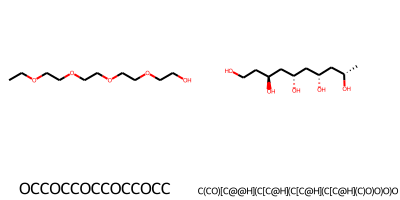

In [ ]:
dup = n_sigma[n_sigma['smiles'] == 'CCO']
cco = [Chem.MolFromSmiles(s) for s in dup.poly_smiles]
Draw.MolsToGridImage(cco, molsPerRow=2, legends=dup.poly_smiles.to_list())

### Plot sigma_profile

In [ ]:
n_sigma.smiles.to_list()

['CCC#N',
 'CC',
 'CCC',
 'CCc1ccccc1',
 'CCCl',
 'C=CC(N)=O',
 'CCCCCC(=O)O',
 'CCO',
 'CCC(=O)O',
 'COC(=O)C(C)C',
 'CO',
 'Cc1cccc(C)c1O',
 'CC(C)O',
 'CCOC(C)=O',
 'CC(F)F',
 'CCN1CCCC1=O',
 'CCO']

####<font color='lightblue'>**CCC#N**<font>

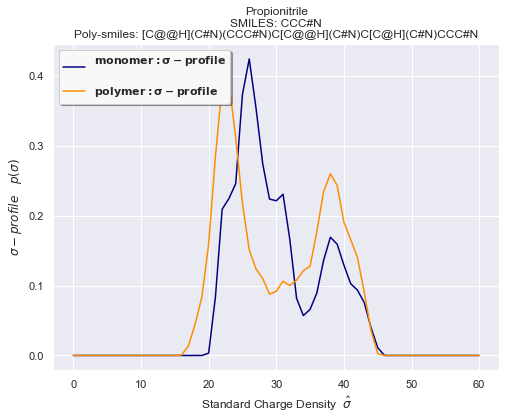

In [ ]:
sigma_compare('CCC#N')

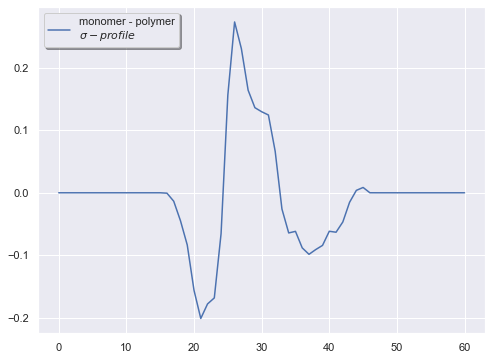

In [ ]:
sigma_profile_rsd("CCC#N", plot=True)

In [ ]:
pd.concat([df_mono[df_mono['smiles'] == 'CCC#N'],
           n_sigma[n_sigma['smiles'] == 'CCC#N']])

Chemical       CAS smiles HSPiP_indx good_smiles single_frag  \
909  Propionitrile  107-12-0  CCC#N       1020        True        True   
0              NaN       NaN  CCC#N        NaN         NaN         NaN   

    duplicated sanity                 label  organic  ...    δp   δh  test  \
909       True   True            hspip_1020     True  ...   NaN  NaN   NaN   
0          NaN    NaN  Polyacrylonitrile-n5     True  ...  15.1  7.9  True   

            poly_label  n_copies  n_frags  largest finished  \
909                NaN       NaN      NaN      NaN      NaN   
0    Polyacrylonitrile       5.0      1.0     True     True   

                         job_name  \
909                           NaN   
0    SOLSPE2_Polyacrylonitrile-n5   

                                        poly_smiles  
909                                             NaN  
0    [C@@H](C#N)(CCC#N)C[C@@H](C#N)C[C@H](C#N)CCC#N  

[2 rows x 46 columns]

#### <font color='lightblue'>**CC**<font>

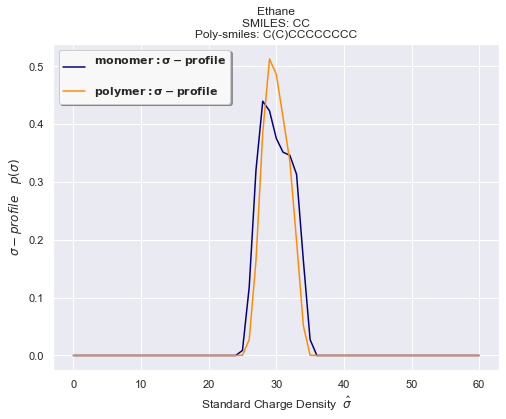

In [ ]:
sigma_compare('CC')

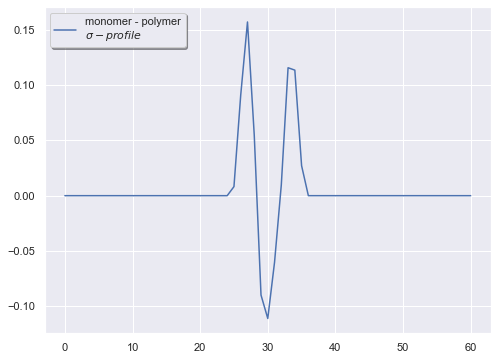

In [ ]:
sigma_profile_rsd('CC')

In [ ]:
pd.concat([df_mono[df_mono['smiles'] == 'CC'],
           n_sigma[n_sigma['smiles'] == 'CC']])

Chemical      CAS smiles HSPiP_indx good_smiles single_frag duplicated  \
484   Ethane  74-84-0     CC        554        True        True      False   
1        NaN      NaN     CC        NaN         NaN         NaN        NaN   

    sanity            label  organic  ...   δp   δh  test    poly_label  \
484   True        hspip_554     True  ...  NaN  NaN   NaN           NaN   
1      NaN  Polyethylene-n5     True  ...  0.8  2.8  True  Polyethylene   

     n_copies  n_frags  largest finished                 job_name  \
484       NaN      NaN      NaN      NaN                      NaN   
1         5.0      1.0     True     True  SOLSPE2_Polyethylene-n5   

      poly_smiles  
484           NaN  
1    C(C)CCCCCCCC  

[2 rows x 46 columns]

#### <font color='lightblue'>**COC(=O)C(C)C**<font>

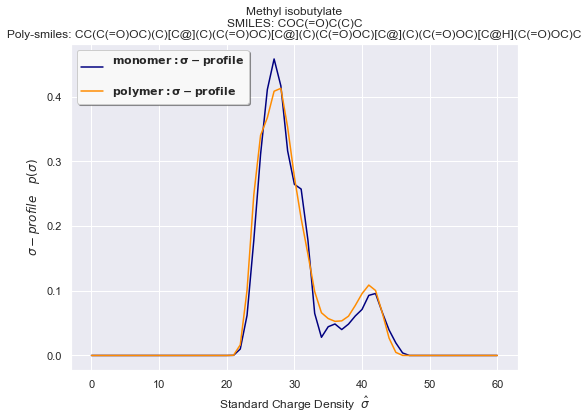

In [ ]:
sigma_compare('COC(=O)C(C)C')

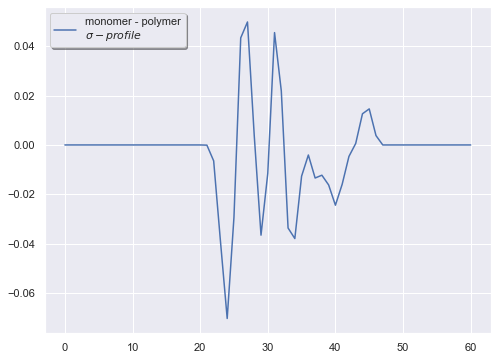

In [ ]:
sigma_profile_rsd('COC(=O)C(C)C')

In [ ]:
pd.concat([df_mono[df_mono['smiles'] == 'COC(=O)C(C)C'],
           n_sigma[n_sigma['smiles'] == 'COC(=O)C(C)C']])

Chemical       CAS        smiles HSPiP_indx good_smiles  \
1576  Methyl isobutylate  547-63-7  COC(=O)C(C)C       1893        True   
21                   NaN       NaN  COC(=O)C(C)C        NaN         NaN   

     single_frag duplicated sanity                      label  organic  ...  \
1576        True       True   True                 hspip_1893     True  ...   
21           NaN        NaN    NaN  Polymethylmethacrylate-n5     True  ...   

        δp   δh   test              poly_label  n_copies  n_frags  largest  \
1576   NaN  NaN    NaN                     NaN       NaN      NaN      NaN   
21    10.5  5.1  False  Polymethylmethacrylate       5.0      1.0     True   

     finished                           job_name  \
1576      NaN                                NaN   
21       True  SOLSPE2_Polymethylmethacrylate-n5   

                                            poly_smiles  
1576                                                NaN  
21    CC(C(=O)OC)(C)[C@](C)(C(=O)OC)[C@](C)(C(=O)OC)...  

[2 rows x 46 columns]

<font color='yellow'>**CORRERLATION MATRIX**<font>

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

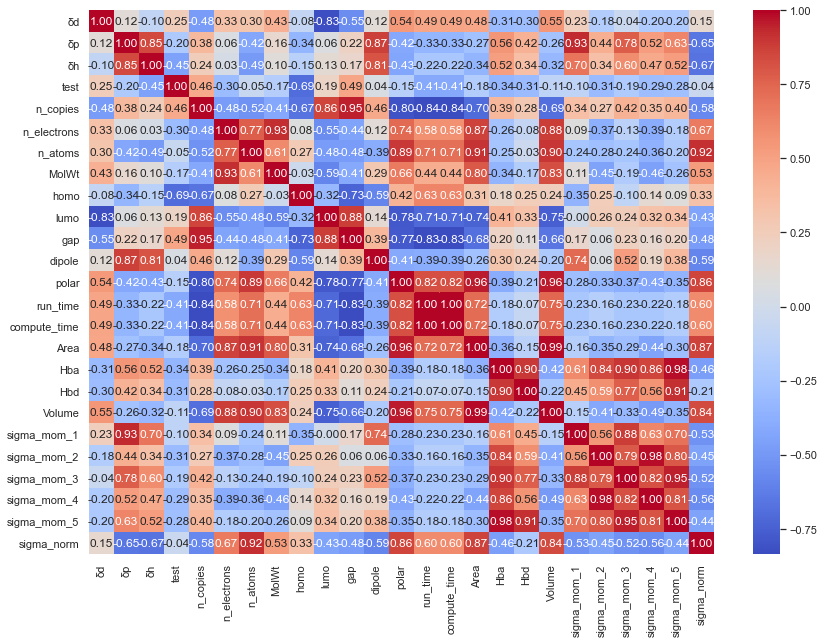

In [ ]:
mono_smiles_50 = Polymer[Polymer['smiles'].str.len() < 50]
poly_smiles_50 = Polymer[Polymer['poly_smiles'].str.len() < 50]

zero_cols = ['charge', 'n_frags', 'n_cores', 'sigma_mom_0', 'organic', 'largest', 'finished']
poly_smiles_50.drop(zero_cols, axis=1, inplace=True)
poly_corr = poly_smiles_50.corr()

fig,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(poly_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

<BarContainer object of 24 artists>

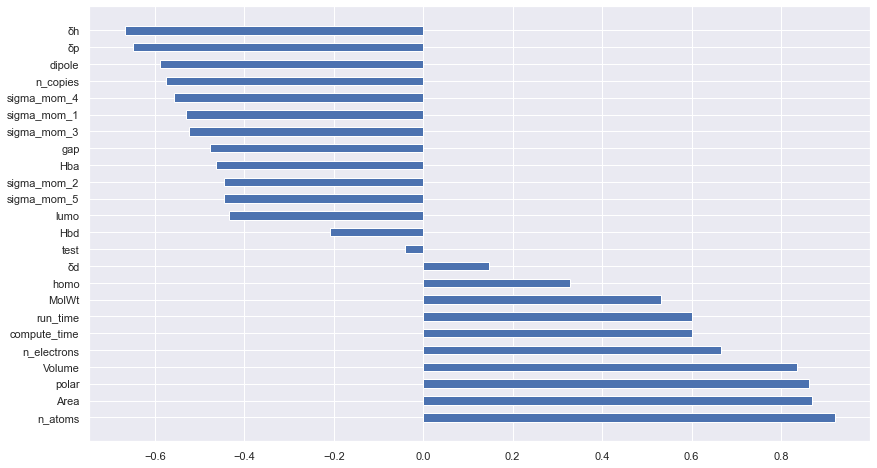

In [ ]:
cdf = poly_corr['sigma_norm'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize=(14, 8))
plt.barh(cdf.index, cdf.values, height=0.5)

In [ ]:
cat_features = poly_smiles_50.select_dtypes('object').columns.to_list()
num_features = poly_smiles_50.select_dtypes(np.number).columns.to_list()

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

Text(0.5, 0, 'Value')

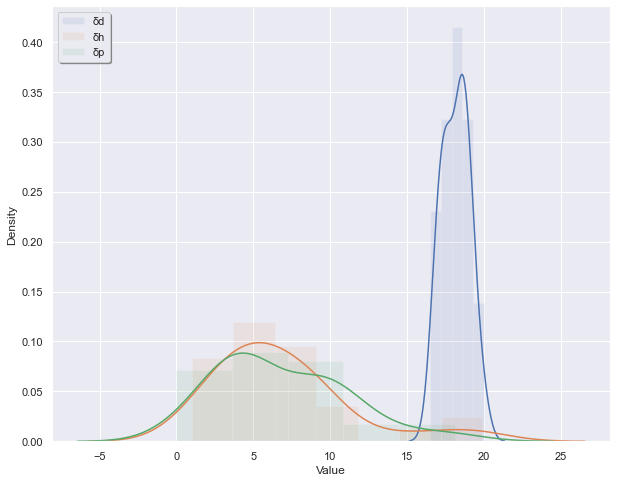

In [ ]:
ax = start_plot(style='darkgrid')
sol = ['δd', 'δh', 'δp']
for k, i in enumerate(sol):
    sns.distplot(Polymer[i], ax=ax, label=i, hist_kws={'linewidth': 1, 'alpha': 0.1})
ax.legend(loc='upper left', frameon=True, shadow=True)
ax.set_xlabel('Value')

### Predict poly-sigma from mono

https://www.yumpu.com/en/document/read/4573278/cosmotherm-user-manual-cosmologic

page:133

https://www.scm.com/doc/COSMO-RS/Polymers_With_COSMO-RS.html

repeat unit, average molecular weight

<font color='yellow'>Multilinear regression

1. features直接預測sigma profile

2. features預測sigma profile間的殘差

<font>

#### features直接預測sigma profile

In [ ]:
n_sigma['rep_unit'] = n_sigma['poly_smiles'].str.len() // n_sigma['smiles'].str.len()

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = df_mono[["sigma_mom_%s" % i for i in range(6)] 
            + ['smiles', 'Hba', 'Hbd', 'Area', 'Volume', 'MolWt', ]]
X_mod = pd.merge(X, n_sigma[['smiles', 'rep_unit']], how='inner')
X_train = X_mod.drop('smiles', axis=1).values
X_name = n_sigma['label'].to_list()
y_train = np.array([np.array(i) for i in n_sigma['sigma_profile'].values])

X_train.shape, y_train.shape, df_mono.shape

((17, 12), (17, 61), (16, 35))

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

In [ ]:
model = simple_ols(X_train, y_train)
y_pred = model.fittedvalues

In [ ]:
big_df = pd.merge(n_sigma['smiles'], df_mono[['smiles', 'sigma_profile']], how='inner')
def vis_sig_plot(index):
    ax = start_plot(figsize=(8, 5), style='darkgrid')
    sns.lineplot(x=x_range, y=y_pred[index],
                  label= r'$\mathbf{predict: \sigma-profile}$', color='navy')
    sns.lineplot(x=x_range, y=y_train[index],
                  label=r'$\mathbf{true: \sigma-profile}$', color='darkorange')
    sns.lineplot(x=x_range, y=big_df['sigma_profile'].iloc[index],
                  label=r'$\mathbf{mono: \sigma-profile}$', color='teal')
    ax.legend(loc="upper left", frameon=True, shadow=True, facecolor="#f8f8f8")
    ax.set_ylabel('$\sigma-profile\quad p(\sigma)$')
    ax.set_xlabel('Standard Charge Density  $\hat \sigma$')
    ax.set_title(X_name[index])

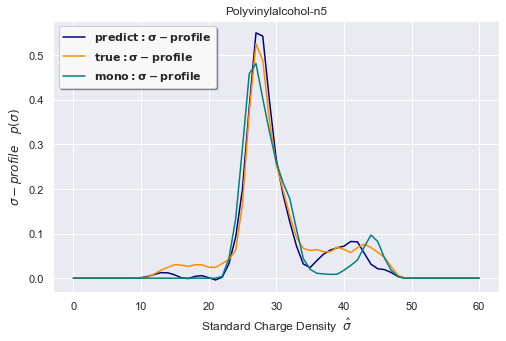

In [ ]:
vis_sig_plot(len(X_name) - 1)

#### features預測sigma res

##(3) Solvents_exp.csv
- The solvents set contains 193 molecules with **experimentally determined** HSP from several sources
- The sizes of these molecules range from two to 85 heavy atoms.

In [ ]:
Solvents = pd.read_csv(solvents)
Solvents.head()

key     Type    δd    δp    δh  \
0     1,1,1-Trichloroethane  Solvent  16.8   4.3   2.0   
1            1,3-Butanediol  Solvent  16.6  10.0  21.5   
2  1,4-Butandiol Diacrylate  Solvent  16.8   9.1   4.2   
3               1,4-Dioxane  Solvent  19.0   1.8   7.4   
4        1-Bromonaphthalene  Solvent  20.3   3.1   4.1   

                   smiles ID_type         ID Ref  organic  ...  Volume  \
0            CC(Cl)(Cl)Cl     CAS    71-55-6   1     True  ...  0.1262   
1                CC(O)CCO     CAS   107-88-0   1     True  ...  0.1230   
2  C=CC(=O)OCCCCOC(=O)C=C     CAS  1070-70-8   1     True  ...  0.2551   
3                C1COCCO1     CAS   123-91-1   1     True  ...  0.1104   
4        Brc1cccc2ccccc12     CAS    90-11-9   1    False  ...  0.1953   

   sigma_mom_0  sigma_mom_1  sigma_mom_2 sigma_mom_3  sigma_mom_4 sigma_mom_5  \
0            0         16.6    -3.835673    4.240154    -2.020584    1.539736   
1            0         68.3    14.000000  116.000000    29.100000  235.000000   
2            0         75.8    36.000000   62.200000    55.200000   71.700000   
3            0         40.8    32.000000   46.600000    56.300000   74.100000   
4            0         29.2    -4.900070    7.591808    -2.532433    2.470338   

   sigma_norm                                      sigma_profile   drug  
0   41.428082  [ 0.          0.          0.          0.      ...  False  
1   32.304402  [ 0.          0.          0.          0.      ...  False  
2   62.637433  [ 0.          0.          0.          0.      ...  False  
3   38.589336  [ 0.          0.          0.          0.      ...  False  
4   55.586884  [ 0.          0.          0.          0.      ...  False  

[5 rows x 39 columns]

#1.2 Feature Engineering

##(1) Sturctural / Topological --> **Molecular Fingerprints**

- Morgan fingerprint: 

    radius = 8, nBits = 2048

- MACCS fingerprint

##(2) Charge density --> **sigma-profile**

- sig_mom_ith: 
    
    The coefficients of the moments of sigma-profile

- sigma-profile feature:
    
    all sigma-profile in datasets can be constrained to
a ***61-length continuous vector*** **-->** normalized to unit vector **-->**
substract the mean signal of all profiles **-->** the Euclidean distance between profiles can be interpreted as the 
cosine distance which indicates similarity for sigma-profiles.

- NMF to 6 components --> finds a basis where most profiles can
be reconstructed from ***6-dimensional weight vectors***

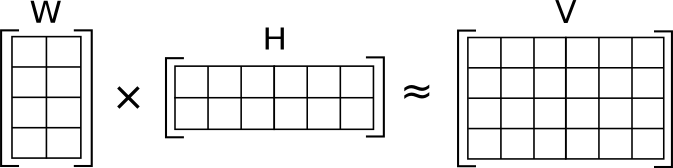

###sigma-moments

###A distribution function can be determined by its statistical moments (If those exist and the moment generating function converges)

-The first order moment is the
total charge which vanishes for molecules

-The second order moment is a measure for
the ability of a solute to interact with a
polarizable continuum. 

http://publications.rwth-aachen.de/record/195599/files/195599.pdf

In [ ]:
sig_mom = HSPiP[["Chemical"] + ["sigma_mom_%s" % i for i in range(6)]]
sig_mom.head()

NameError: ignored

##(3) Electrostatic

- dipole moment

- polarizability

- hydrogen bonding moments: 
    
    the first moment for the donor and acceptor.
These moments are descriptions of the sigma-profile calculated only on
hydrogen bonding acceptors and donors atoms

- simga-profile norm: 
    
    can be intrepreted as a proxy for the magnitude of the polarity properties of a molecule


In [ ]:
h_b = HSPiP[["Chemical"] + ["Hba", "Hbd", "sigma_norm"]]
h_b.head()

Chemical     Hba     Hbd  sigma_norm
0  Acetaldehyde  0.6278  0.0000   22.203331
1  Acetaldoxime  1.9213  3.9919   21.885302
2     Acetamide  3.6522  1.4629   19.349175
3   Acetanilide  2.1759  1.4190   40.872215
4   Acetic Acid  1.5845  4.9479   19.380647

##(4) Shape and size

- Molecular weights

- COSMO solvation surface area

- COSMO volume

COSMO surface area and volume provides indirect information about the shape of a molecule based on the space it occupies and it's arrangement

#1.3 Results

In [ ]:
github_pred = "https://raw.githubusercontent.com/aspuru-guzik-group/gpHSP/master/results/HSPiP_predictions.csv"

pred = fetch_file_via_requests(github_pred, solubility)
localname = pred.split("/")[-1]
print(f"{localname:s} fetched")

HSPiP_predictions.csv fetched


In [ ]:
import pandas as pd

pred_dres = os.path.join(solubility, localname)
HSPiP_pred = pd.read_csv(pred_dres)
HSPiP_pred[['δd_gp_pred', 'δh_gp_pred', 'δp_gp_pred']]

δd_gp_pred  δh_gp_pred  δp_gp_pred
0      15.656610    6.047631   10.043530
1      15.872438   12.398355    6.395821
2      17.651273   18.596124   19.530803
3      19.551465    8.576593    9.062794
4      15.269878   14.678121    5.867294
...          ...         ...         ...
8847   19.309925   15.374546   13.343233
8848   18.885949   14.942159    9.587179
8849   19.821749    9.900809    7.376451
8850   19.204370   10.083568    7.198831
8851   19.237023    9.254349    9.398438

[8852 rows x 3 columns]

# GDB9 test

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Model, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
gdb_df = pd.read_csv(gdb)

In [ ]:
gdb_prop = gdb_df.drop(['SMILES from B3LYP relaxation', 'Index'], axis=1)
gdb_prop.head()

Rotaional A  Rotational B  Rotational C  Dipole Moment  \
0    157.71180    157.709970    157.706990         0.0000   
1    293.60975    293.541110    191.393970         1.6256   
2    799.58812    437.903860    282.945450         1.8511   
3      0.00000     35.610036     35.610036         0.0000   
4      0.00000     44.593883     44.593883         2.8937   

   Isotropic Polarizability  HOMO (Ha)  LUMO (Ha)  HOMOLUMO Gap (Ha)  \
0                     13.21    -0.3877     0.1171             0.5048   
1                      9.46    -0.2570     0.0829             0.3399   
2                      6.31    -0.2928     0.0687             0.3615   
3                     16.28    -0.2845     0.0506             0.3351   
4                     12.99    -0.3604     0.0191             0.3796   

   Electronic Spatial Extent  Zero point vibrational energy  \
0                    35.3641                       0.044749   
1                    26.1563                       0.034358   
2                    19.0002                       0.021375   
3                    59.5248                       0.026841   
4                    48.7476                       0.016601   

   Internal energy at 0 K  Internal energy at 298.15 K  Enthalpy at 298.15 K  \
0              -40.478930                   -40.476062            -40.475117   
1              -56.525887                   -56.523026            -56.522082   
2              -76.404702                   -76.401867            -76.400922   
3              -77.308427                   -77.305527            -77.304583   
4              -93.411888                   -93.409370            -93.408425   

   Free energy at 298.15 K  Heat capacity at 298.15 K SMILES  
0               -40.498597                      6.469      C  
1               -56.544961                      6.316      N  
2               -76.422349                      6.002      O  
3               -77.327429                      8.574    C#C  
4               -93.431246                      6.278    C#N

<AxesSubplot:>

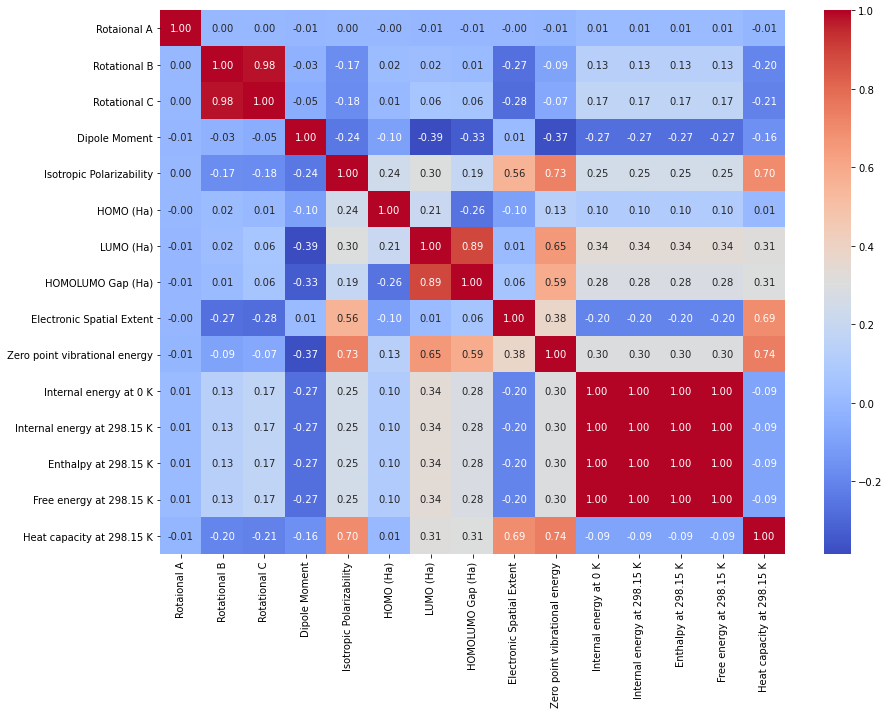

In [ ]:
gdb_corr = gdb_prop.corr()

fig,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(gdb_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

#### Thermaldynamics properties

For Internal energy at 0K, 273K & Free energy, these properties are the same, under the condition of small PV contribution, which means that the molecules is not calculated in vapor phase.

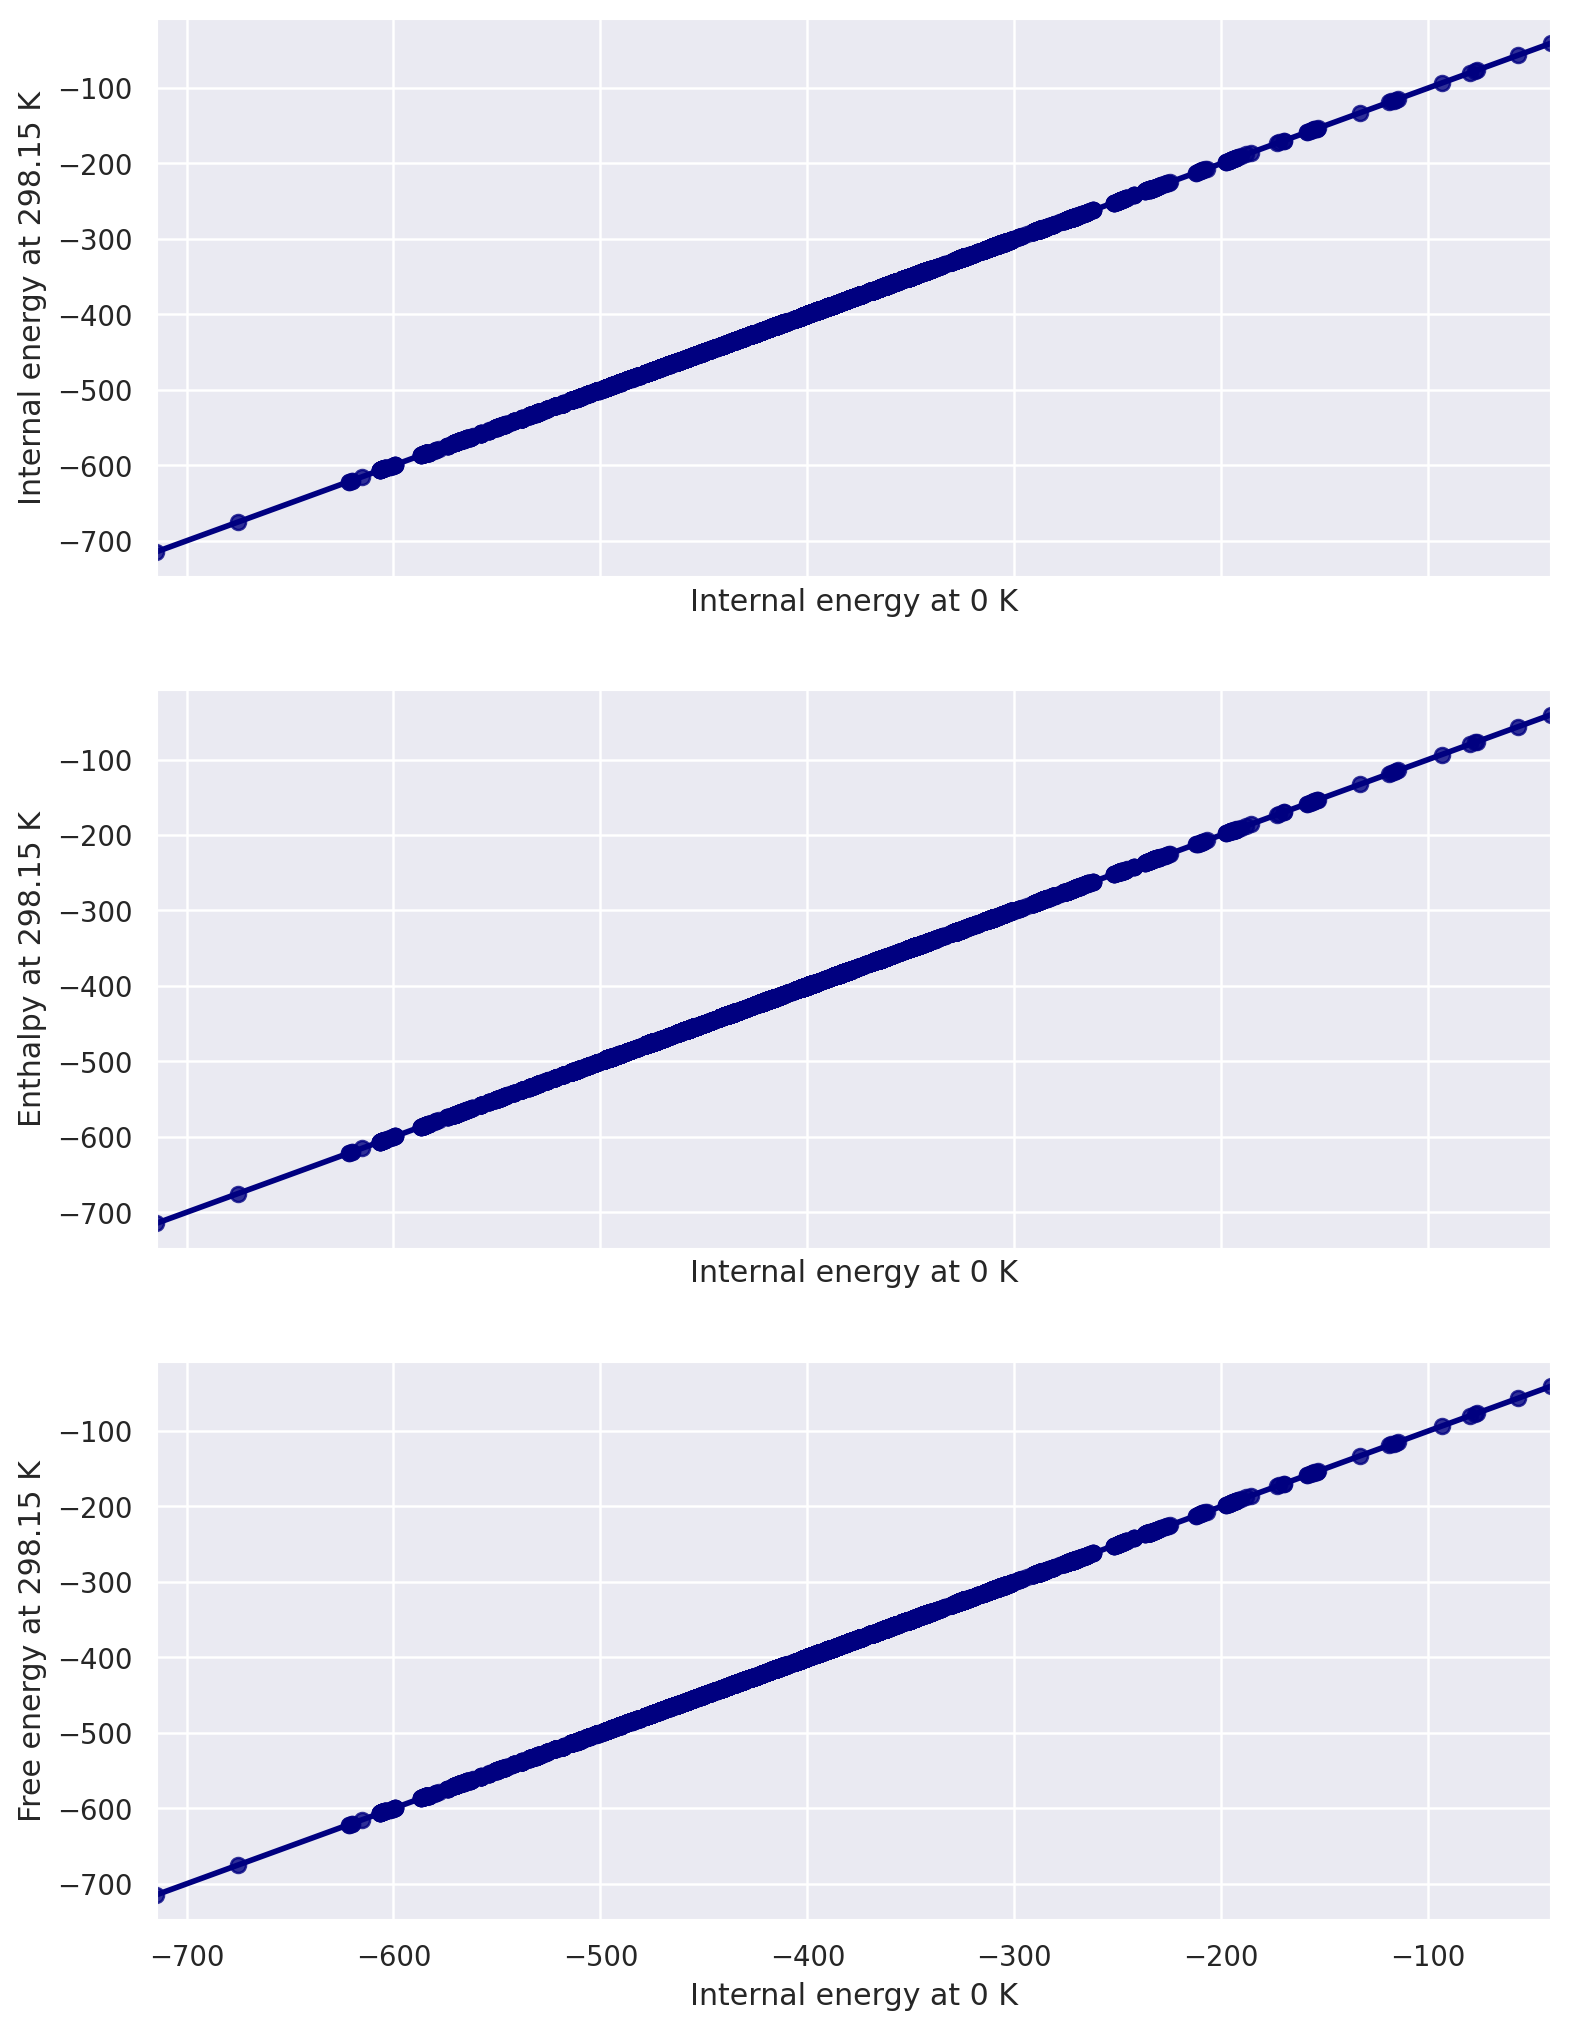

In [ ]:
sns.set()
fig, ax = plt.subplots(3, 1, figsize=(10, 14), sharex=True, dpi=180)
sns.regplot(x='Internal energy at 0 K', y='Internal energy at 298.15 K',
        data=gdb_prop,ax=ax[0], color='navy')
sns.regplot(x='Internal energy at 0 K', y='Enthalpy at 298.15 K',
        data=gdb_prop,ax=ax[1],  color='navy')
sns.regplot(x='Internal energy at 0 K', y='Free energy at 298.15 K',
        data=gdb_prop,ax=ax[2], color='navy')

In [ ]:
gdb_df.shape

(133885, 18)

In [ ]:
import matplotlib.transforms as transforms

smiles = gdb_df.SMILES

def plot_data_points(prop_name, ymax=None, ymin=None, data_return=False):
    Propers = gdb_prop[prop_name]
    
    if ymax is None:
        ymax = np.mean(Propers) + 3 * np.std(Propers)
    if ymin is None:
        ymin = np.mean(Propers) - 3 * np.std(Propers)
    
    new_data = Propers.loc[(Propers <= ymax) & (Propers >= ymin)]
    new_smiles = smiles.loc[new_data.index]
    
    value = [ymax, ymin, np.mean(Propers)]
    color = ['red', 'red', 'darkorange']
    text = ['$\mu$ + 3 $\sigma$' if ymax is None else '%.4f' % ymax,
         '$\mu$ - 3 $\sigma$' if ymax is None else '%.4f' % ymin, 
         '$\mu$ = %.4f' % np.mean(Propers)]

    ax = start_plot(figsize=(7, 5), style='darkgrid', dpi=120)
    # ax.scatter(range(len(outliers)), outliers.values, c='navy', label=r'$\mathbf{Outliers: %s}$' % len(outliers), s=5)
    ax.scatter(range(len(new_data.values)), new_data, c='teal', 
        label=r'$\mathbf{Pass: }$' + '\nMin: %s\nMax: %s' % (new_data.min(), new_data.max()), s=5)
    for i, k in zip(value, color):
        ax.axhline(i, ls='--', c=k)

    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)

    for i, j, k in zip(value, text, color):
        ax.text(0, i, j, c=k, va='center', ha='right', transform=trans)

    ax.legend(loc='upper right', frameon=True, shadow=True)
    plt.xlabel('datasize')
    plt.ylabel(prop_name)
    plt.title('%s\n  $\sigma = %.4f $'%(prop_name, np.std(new_data)))
    
    rev_data = pd.concat([new_data, new_smiles], axis=1)

    ax = start_plot(figsize=(8, 5), style='darkgrid')
    sns.distplot(rev_data[prop_name], label=prop_name)
    if data_return is True:       
        return rev_data

#### Rotational A

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


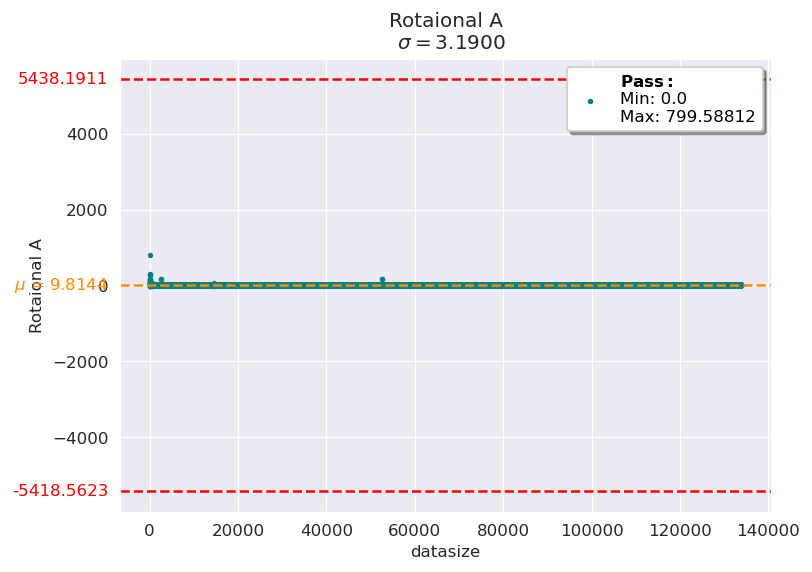

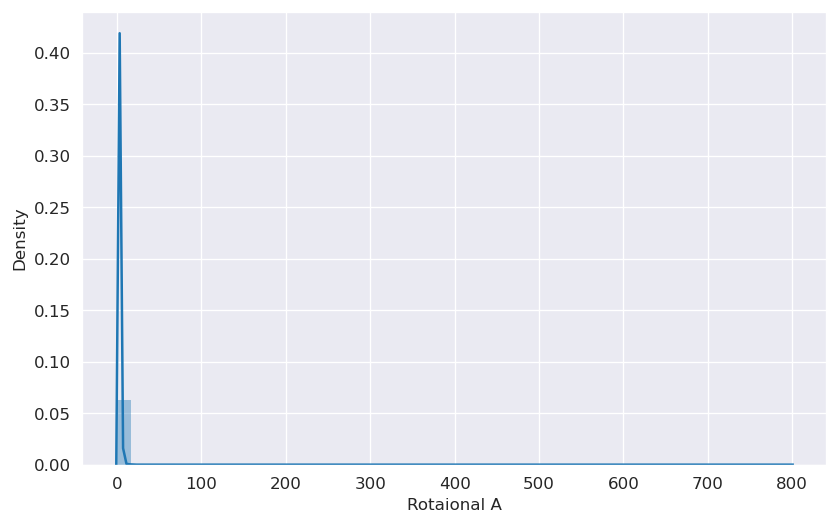

In [ ]:
r_a = plot_data_points('Rotaional A', data_return=True)

#### Rotational B

<AxesSubplot:>

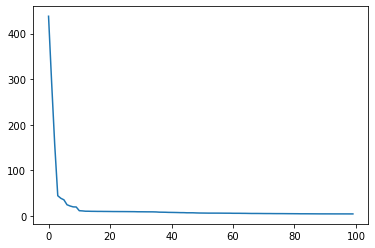

In [ ]:
gdb_prop['Rotational B'].sort_values(ascending=False)[:100].reset_index()['Rotational B'].plot()

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


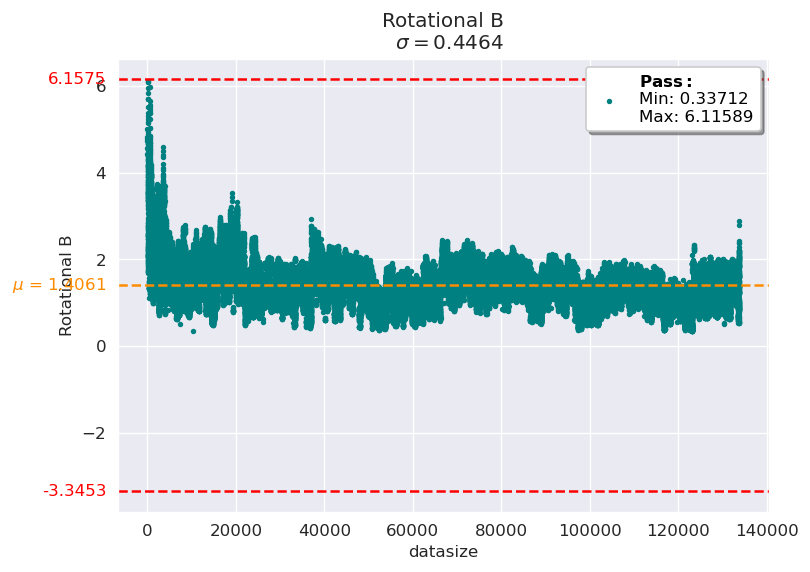

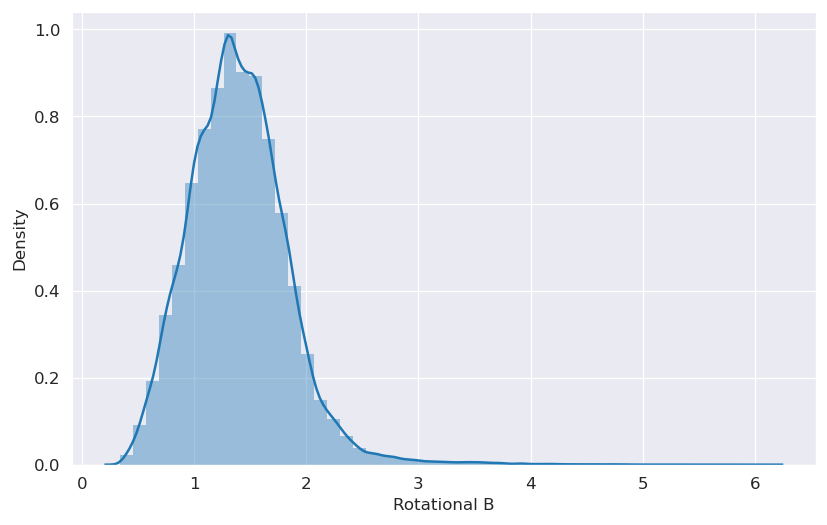

In [ ]:
r_b = plot_data_points('Rotational B', data_return=True)

#### Rotational C

<AxesSubplot:>

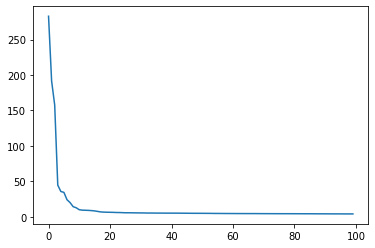

In [ ]:
gdb_prop['Rotational C'].sort_values(ascending=False)[:100].reset_index()['Rotational C'].plot()

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Wall time: 1.13 s


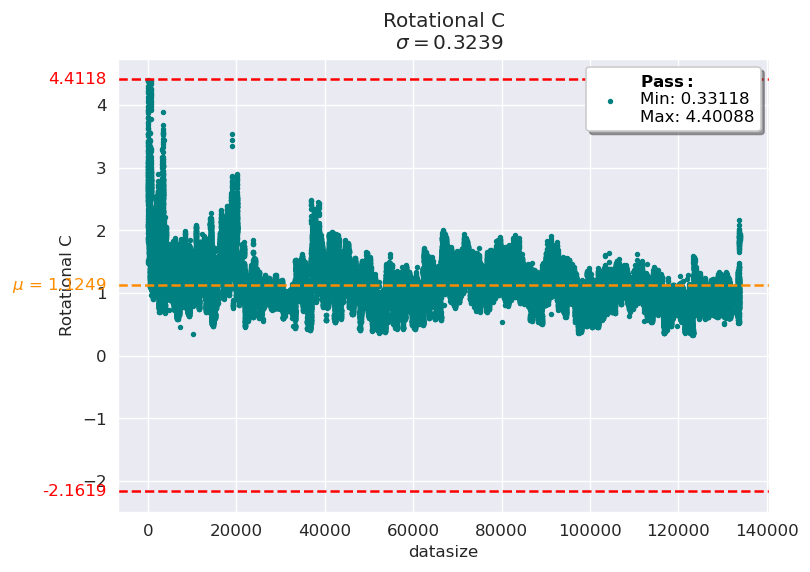

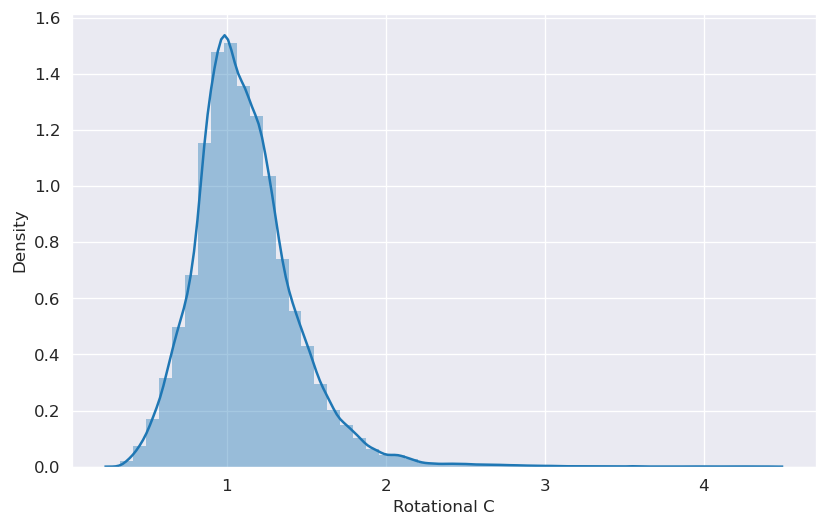

In [ ]:
%%time
r_c = plot_data_points('Rotational C', data_return=True)

#### Dipole

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Wall time: 575 ms


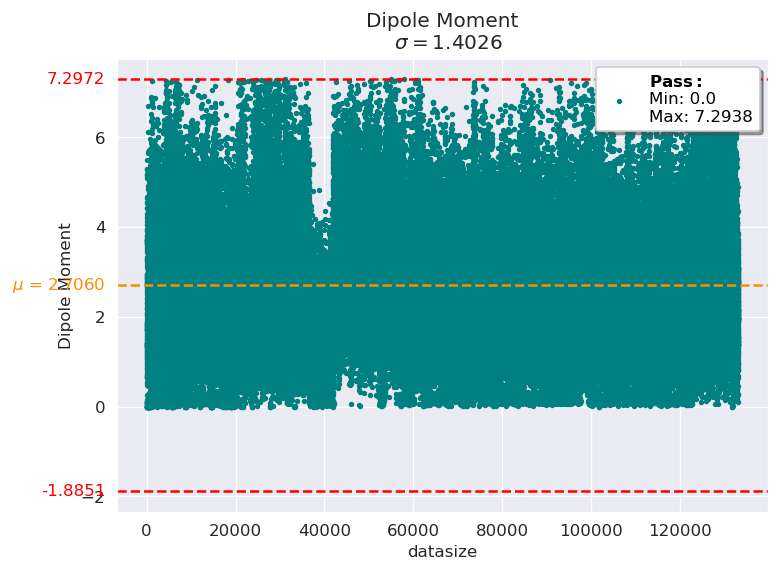

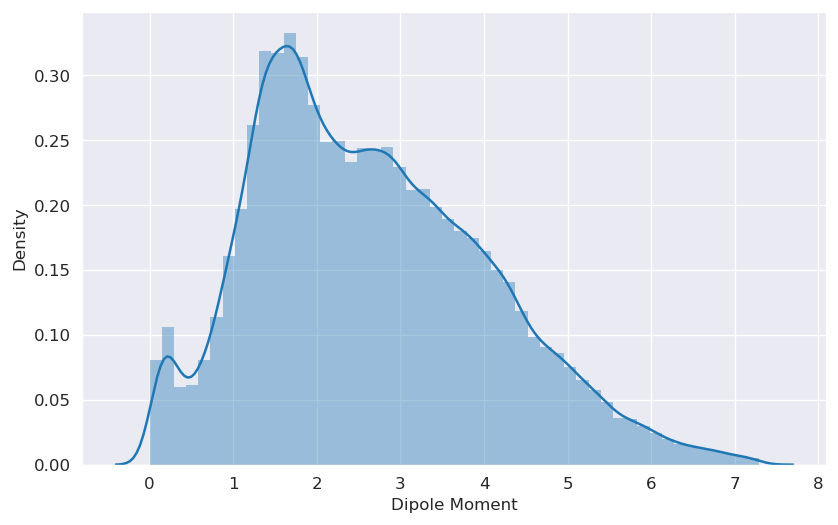

In [ ]:
%%time
dip_mom = plot_data_points('Dipole Moment', data_return=True)

#### HOMO

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


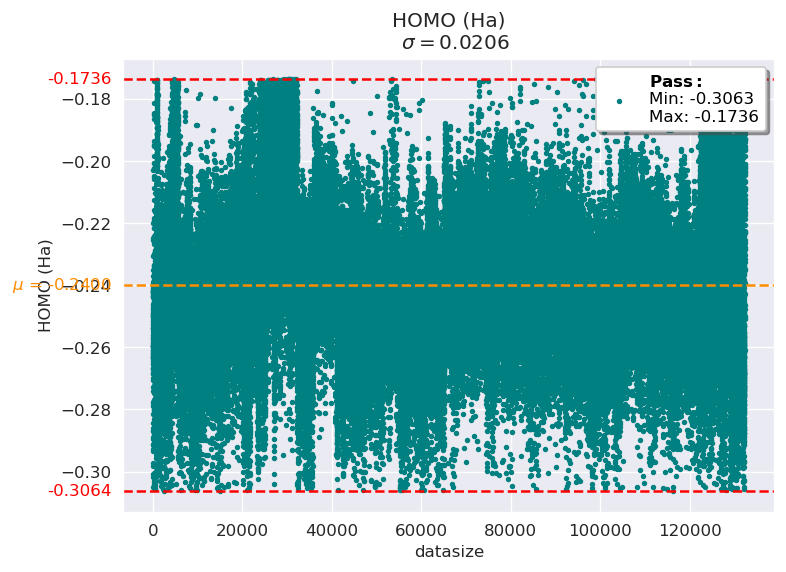

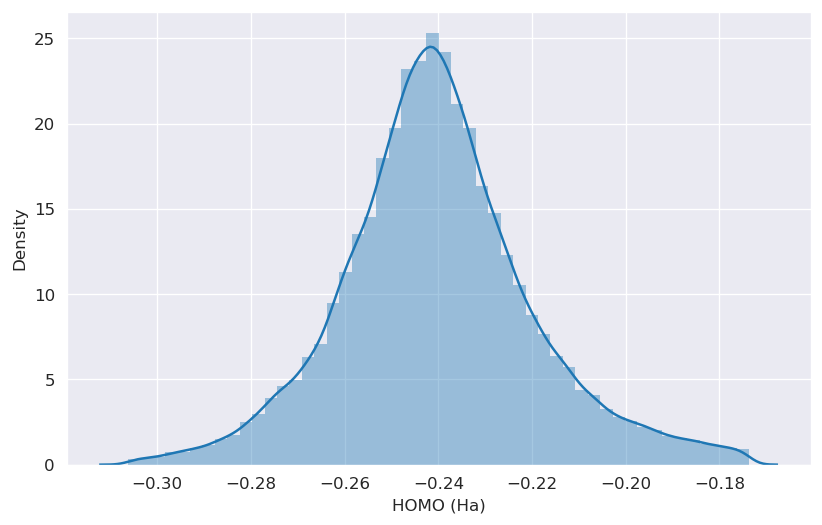

In [ ]:
homo = plot_data_points('HOMO (Ha)', data_return=True)

#### LUMO

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


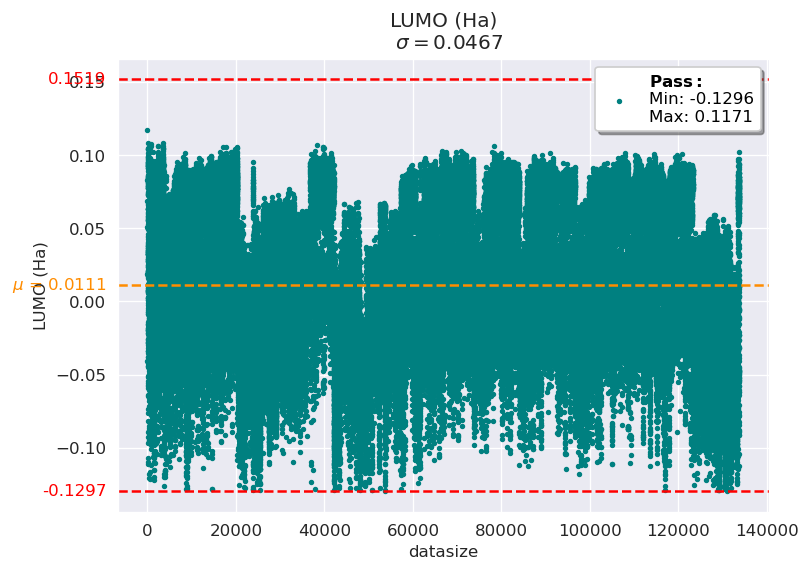

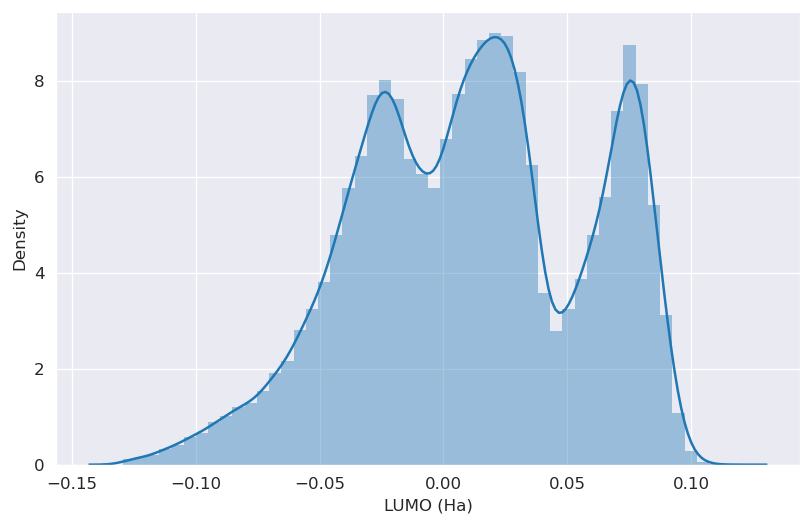

In [ ]:
lumo = plot_data_points('LUMO (Ha)', data_return=True)

#### gap

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


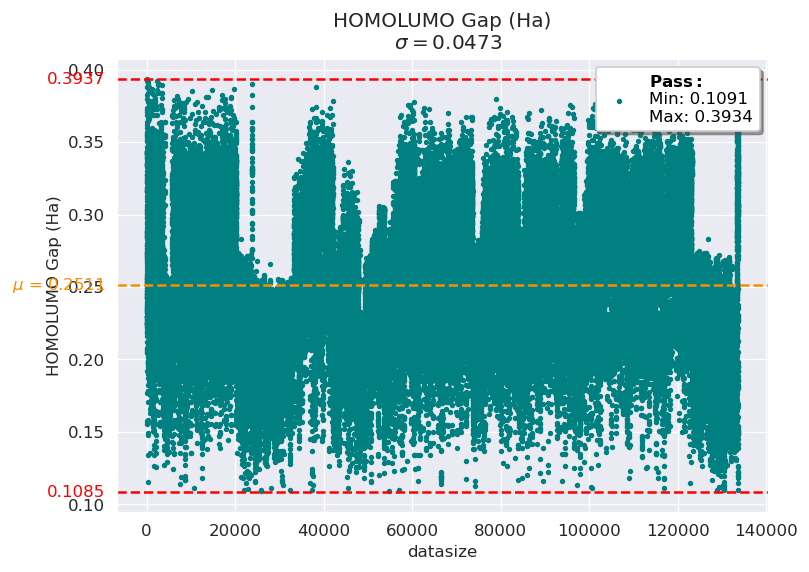

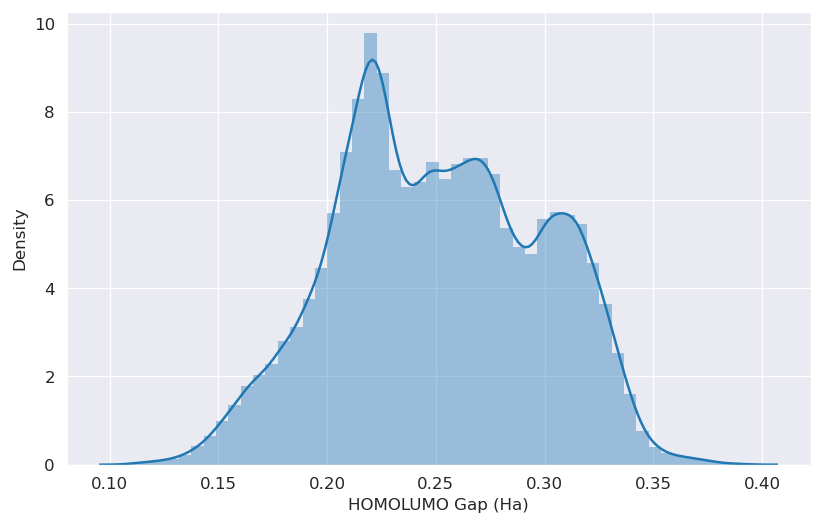

In [ ]:
gap = plot_data_points('HOMOLUMO Gap (Ha)', data_return=True)

#### Isotropic Polarizability

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


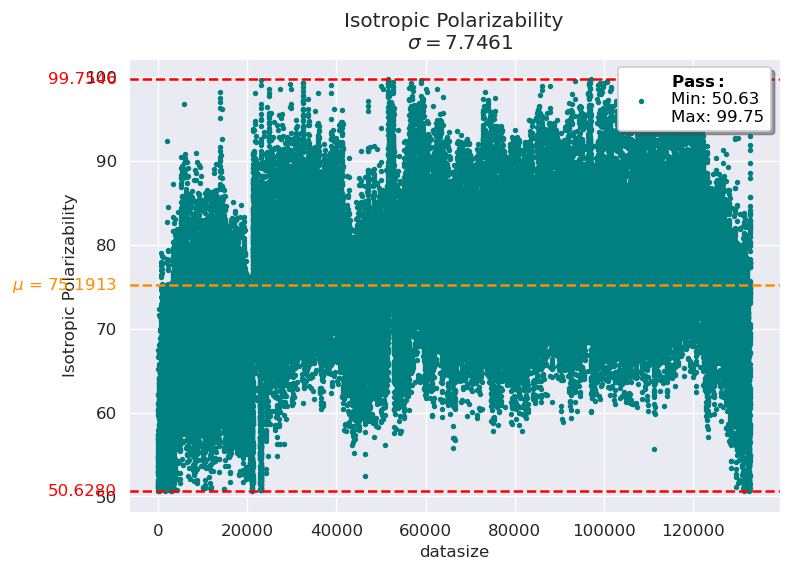

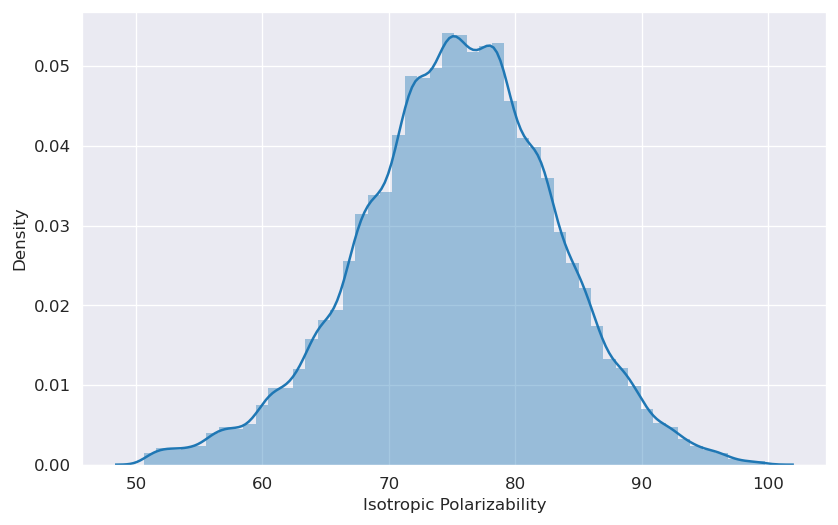

In [ ]:
ip = plot_data_points('Isotropic Polarizability', data_return=True)

#### Electronic Spatial Extent

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


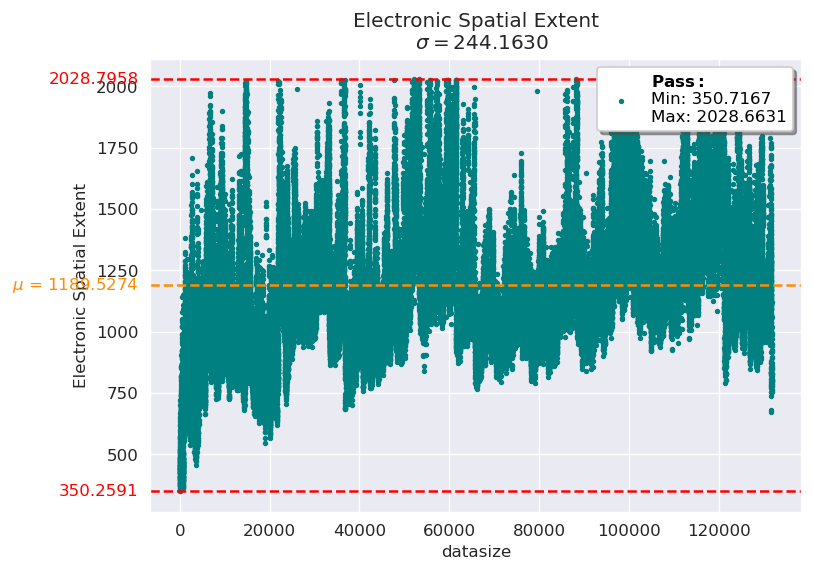

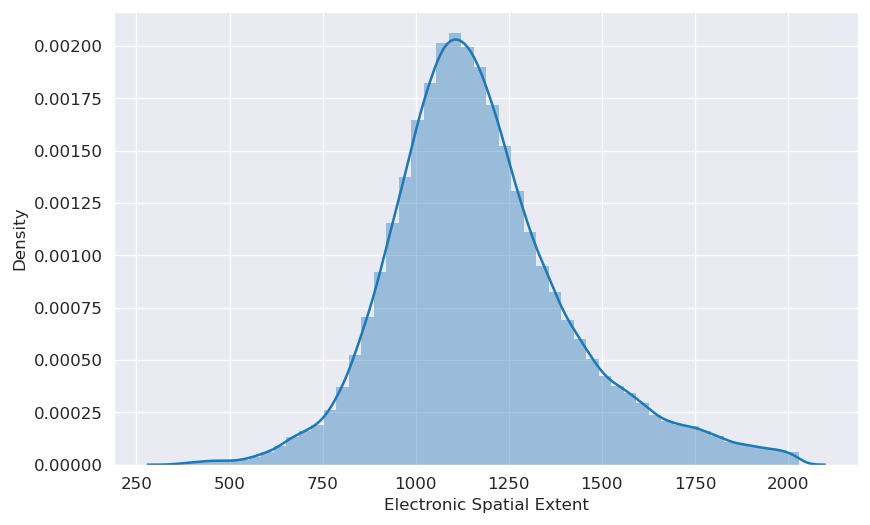

In [ ]:
ese = plot_data_points('Electronic Spatial Extent', data_return=True)

#### Zero point vibrational energy

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


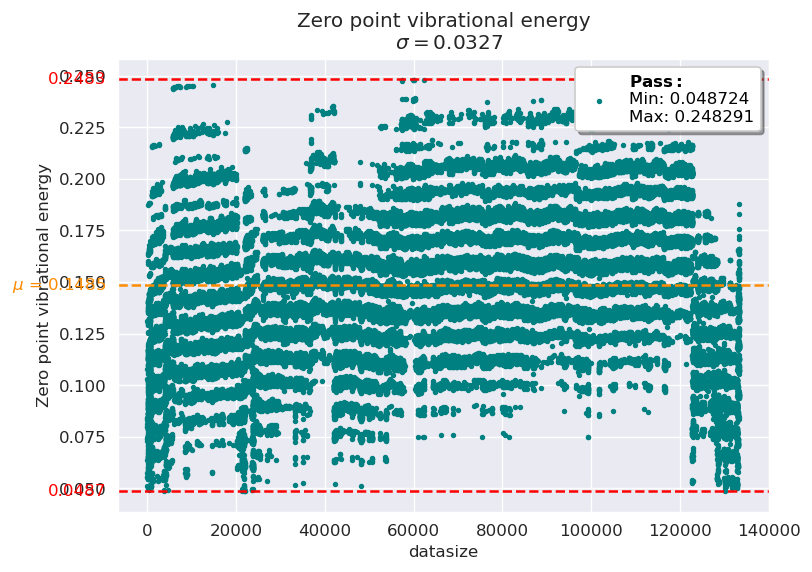

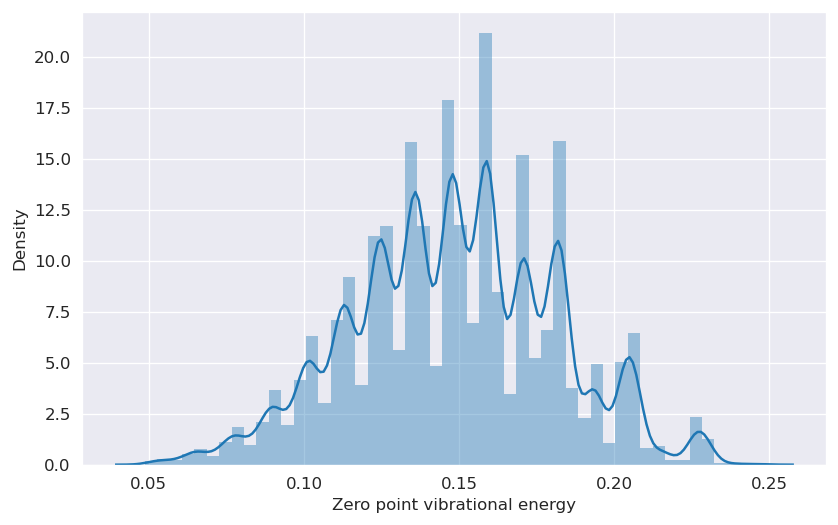

In [ ]:
zpve = plot_data_points('Zero point vibrational energy', data_return=True)

#### Internal energy & enthalpy

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


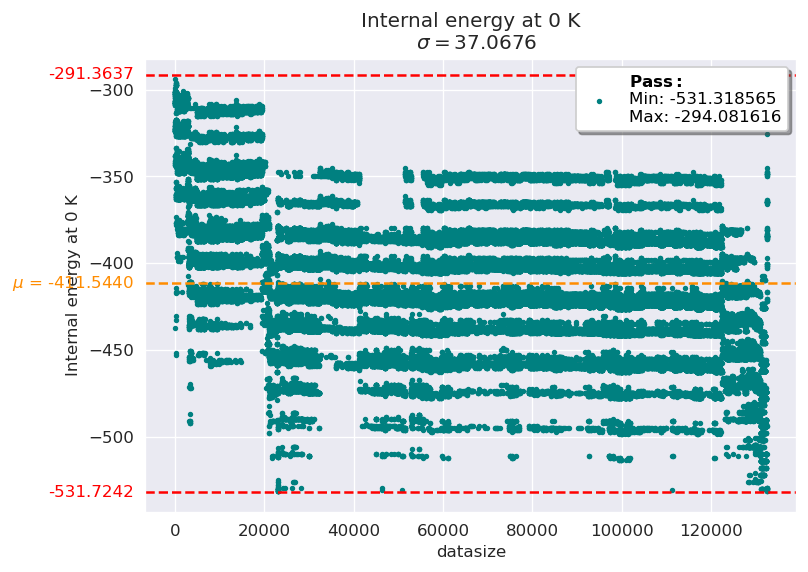

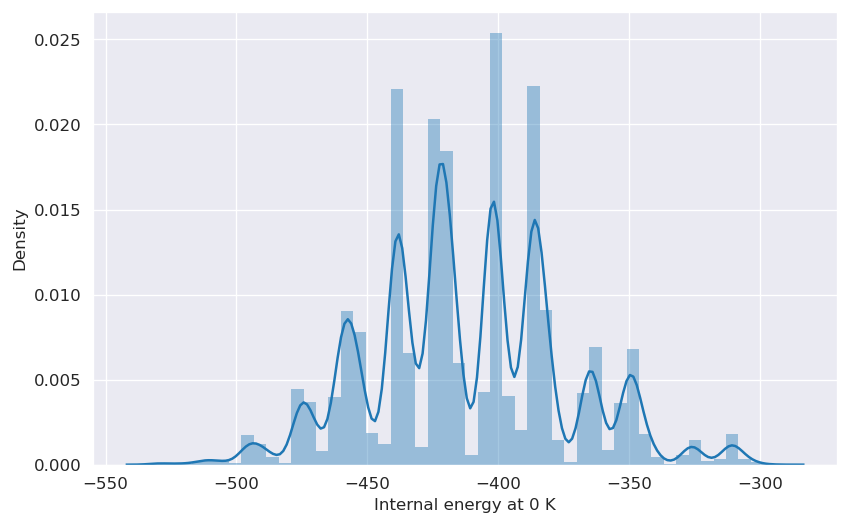

In [ ]:
u_e = plot_data_points('Internal energy at 0 K', data_return=True)

#### Heat capacity

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


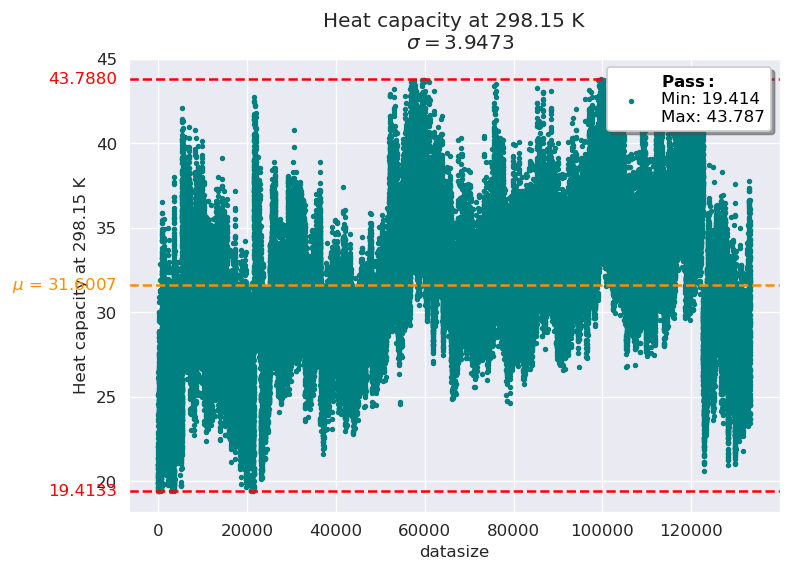

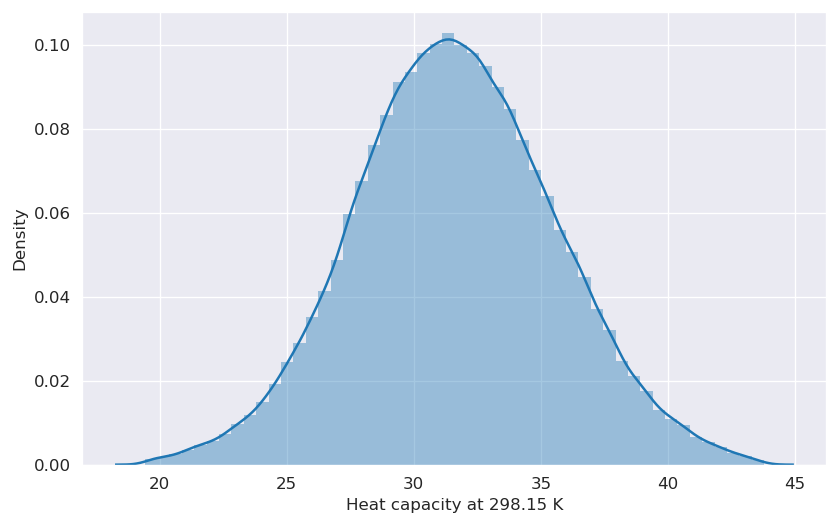

In [ ]:
cp = plot_data_points('Heat capacity at 298.15 K', data_return=True)

#### First Task syntheitc

In [ ]:
print(len(r_a))

133883


In [ ]:
import torch

In [ ]:
k_properties = [gdb_prop.SMILES, r_a, r_b, r_c, dip_mom, homo, lumo,
         gap, ip, ese, zpve, u_e, cp]

k_cols = ['SMILES', 'Rotaional A', 'Rotational B', 'Rotational C', 'Dipole Moment',
      'HOMO (Ha)', 'LUMO (Ha)', 'HOMOLUMO Gap (Ha)', 'Isotropic Polarizability', 'Electronic Spatial Extent',
      'Zero point vibrational energy', 'Internal energy at 0 K',
      'Heat capacity at 298.15 K']

a_list = []
for p in k_properties:
    a_list.append(set(p.index))

idx_list = list(set.intersection(*a_list))
len(idx_list)

127281

In [ ]:
all_df = k_properties[0]

for df in k_properties:
    all_df = pd.merge(all_df, df, how='inner')

all_df.reindex(columns=k_cols)

all_df.index = idx_list
all_df.head()

SMILES  Rotaional A  Rotational B  Rotational C  Dipole Moment  \
226  CC(C)(O)CO      4.50357       2.67369       2.67044         0.1987   
256   CC(C)OC=O      7.45140       2.03598       1.73685         4.1216   
263   CCNC(N)=O      8.47929       1.99776       1.72070         3.5648   
264   CCOC(C)=O      8.41550       2.08732       1.72634         1.9371   
267   COCC(C)=O      8.89923       1.94768       1.64777         3.6117   

     HOMO (Ha)  LUMO (Ha)  HOMOLUMO Gap (Ha)  Isotropic Polarizability  \
226    -0.2619     0.0727             0.3346                     52.67   
256    -0.2748     0.0115             0.2863                     51.48   
263    -0.2427     0.0598             0.3025                     50.96   
264    -0.2654     0.0196             0.2850                     50.66   
267    -0.2449    -0.0102             0.2347                     51.17   

     Electronic Spatial Extent  Zero point vibrational energy  \
226                   609.3369                       0.139933   
256                   712.2912                       0.117552   
263                   719.1944                       0.120088   
264                   719.0142                       0.117704   
267                   743.2534                       0.116412   

     Internal energy at 0 K  Heat capacity at 298.15 K  
226             -308.769557                     28.879  
256             -307.602080                     24.383  
263             -303.795699                     25.169  
264             -307.614861                     24.457  
267             -307.571921                     24.783

In [ ]:
%%time
from pandas_profiling import ProfileReport

profile = ProfileReport(all_df, title='GDB Analysis')

print('report generated')

report generated
Wall time: 1.47 s


In [ ]:
profile.to_file(solubility, 'gdb_profile_demo.html')

#### Ditribution plot

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_all_df = scaler.fit_transform(all_df.drop(columns=['SMILES'], axis=1))

Text(0.5, 1.0, 'Distribution after Standard Scaler transform : 127281 samples')

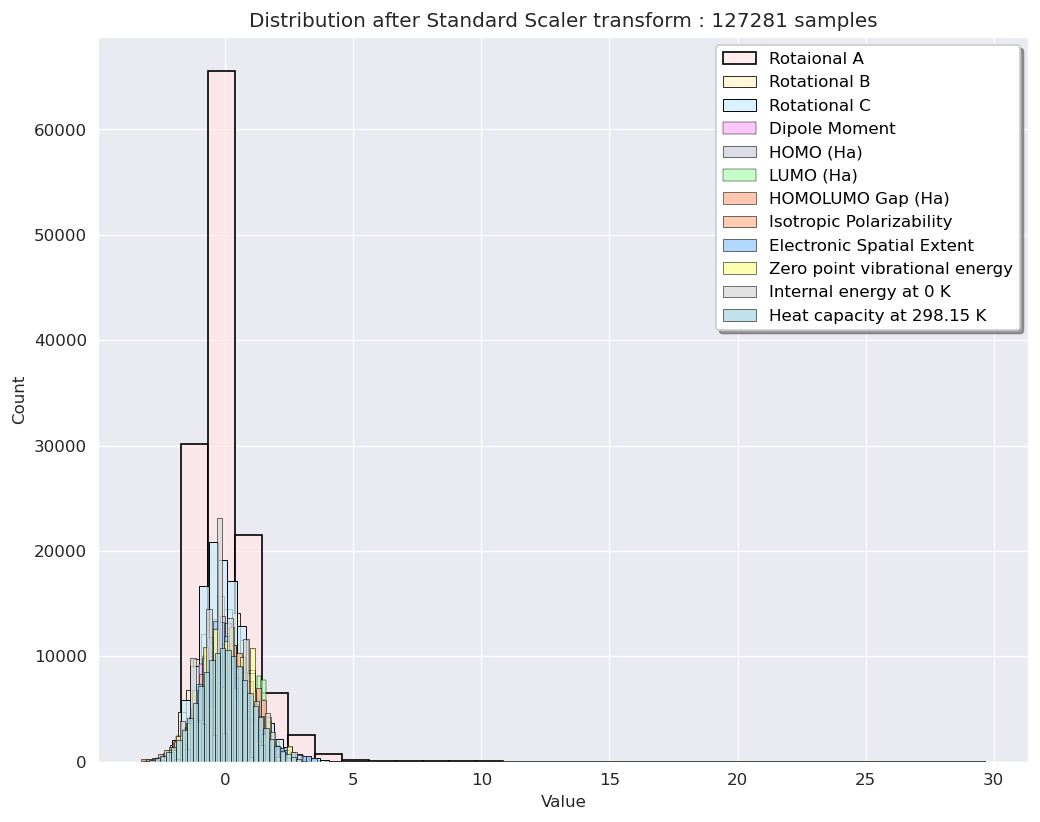

In [ ]:
ax = start_plot(figsize=(10, 8), style='darkgrid')

color = ['#ffe6e6', '#fff5cc', '#cceeff', '#ffb3ff', '#d1d1e0',
     '#b3ffb3', '#ffb399', '#ffbb99', '#99ccff', '#ffff99',
     '#d9d9d9', 'lightblue']

for i in range(len(k_cols[1:])): # Except SMILES
    sns.histplot(std_all_df[:, i], label=k_cols[1:][i], bins=30, color=color[i])
ax.legend(loc='best', frameon=True, shadow=True)
ax.set_xlabel('Value')
ax.set_title('Distribution after Standard Scaler transform : %d samples' % len(std_all_df))

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


array([[8.09876561e-01, 0.00000000e+00],
       [9.80056882e-01, 0.00000000e+00],
       [9.62430835e-01, 0.00000000e+00],
       [9.75887239e-01, 0.00000000e+00],
       [9.88006830e-01, 0.00000000e+00],
       [9.78860795e-01, 0.00000000e+00],
       [9.87631500e-01, 0.00000000e+00],
       [9.97720778e-01, 1.53970317e-35],
       [9.65495765e-01, 0.00000000e+00],
       [9.96628940e-01, 9.33825297e-42],
       [9.90362644e-01, 0.00000000e+00],
       [9.99318063e-01, 1.17906195e-19]])

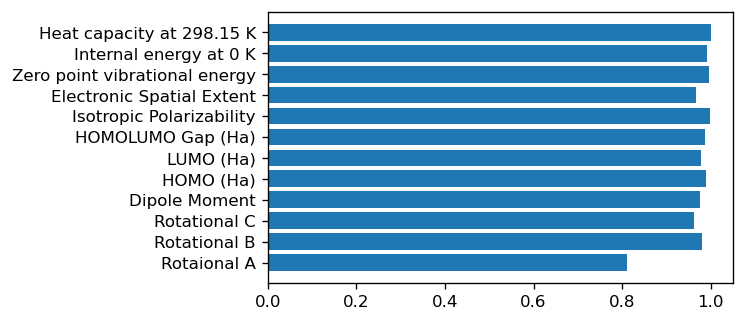

In [ ]:
import scipy.stats

fig, ax = plt.subplots(figsize=(5, 3), dpi=120)
X = all_df.drop(['SMILES'], axis=1)
num_features = X.select_dtypes(include=np.number).columns.tolist()

stats = np.zeros((len(num_features), 2))

for i, e in enumerate(num_features):
    stats[i] = scipy.stats.shapiro(X[e])


ax.barh(num_features, stats[:, 0])

for i in range(len(num_features)):
    if stats[i, 1] > 0.005:
        ax.axhline(y=i, c='brown')

stats

In [ ]:
all_df.describe()

Rotaional A   Rotational B   Rotational C  Dipole Moment  \
count  127281.000000  127281.000000  127281.000000  127281.000000   
mean        3.324317       1.397157       1.119049       2.679172   
std         1.187551       0.404893       0.292230       1.396391   
min         1.273140       0.523870       0.504660       0.000000   
25%         2.543060       1.105510       0.918990       1.601700   
50%         3.061810       1.376530       1.084600       2.505200   
75%         3.756590       1.652470       1.279700       3.623000   
max        38.607650       4.199560       3.683030       7.293800   

           HOMO (Ha)      LUMO (Ha)  HOMOLUMO Gap (Ha)  \
count  127281.000000  127281.000000      127281.000000   
mean       -0.239791       0.011179           0.250971   
std         0.020364       0.046301           0.046541   
min        -0.306300      -0.129600           0.109600   
25%        -0.252000      -0.023600           0.216400   
50%        -0.240800       0.011800           0.249600   
75%        -0.228700       0.047800           0.287500   
max        -0.173600       0.108200           0.390300   

       Isotropic Polarizability  Electronic Spatial Extent  \
count             127281.000000              127281.000000   
mean                  75.317993                1177.323566   
std                    7.460207                 237.977359   
min                   50.660000                 500.338200   
25%                   70.580000                1019.670600   
50%                   75.500000                1145.160000   
75%                   80.370000                1298.871700   
max                   99.620000                2028.663100   

       Zero point vibrational energy  Internal energy at 0 K  \
count                  127281.000000           127281.000000   
mean                        0.148968             -412.138539   
std                         0.031827               36.766696   
min                         0.048724             -531.311262   
25%                         0.125769             -437.903452   
50%                         0.148522             -417.946551   
75%                         0.171119             -387.068044   
max                         0.245257             -302.238859   

       Heat capacity at 298.15 K  
count              127281.000000  
mean                   31.607934  
std                     3.825208  
min                    19.432000  
25%                    28.994000  
50%                    31.538000  
75%                    34.168000  
max                    43.787000

#### Heatmap: correlation matrix

<AxesSubplot:>

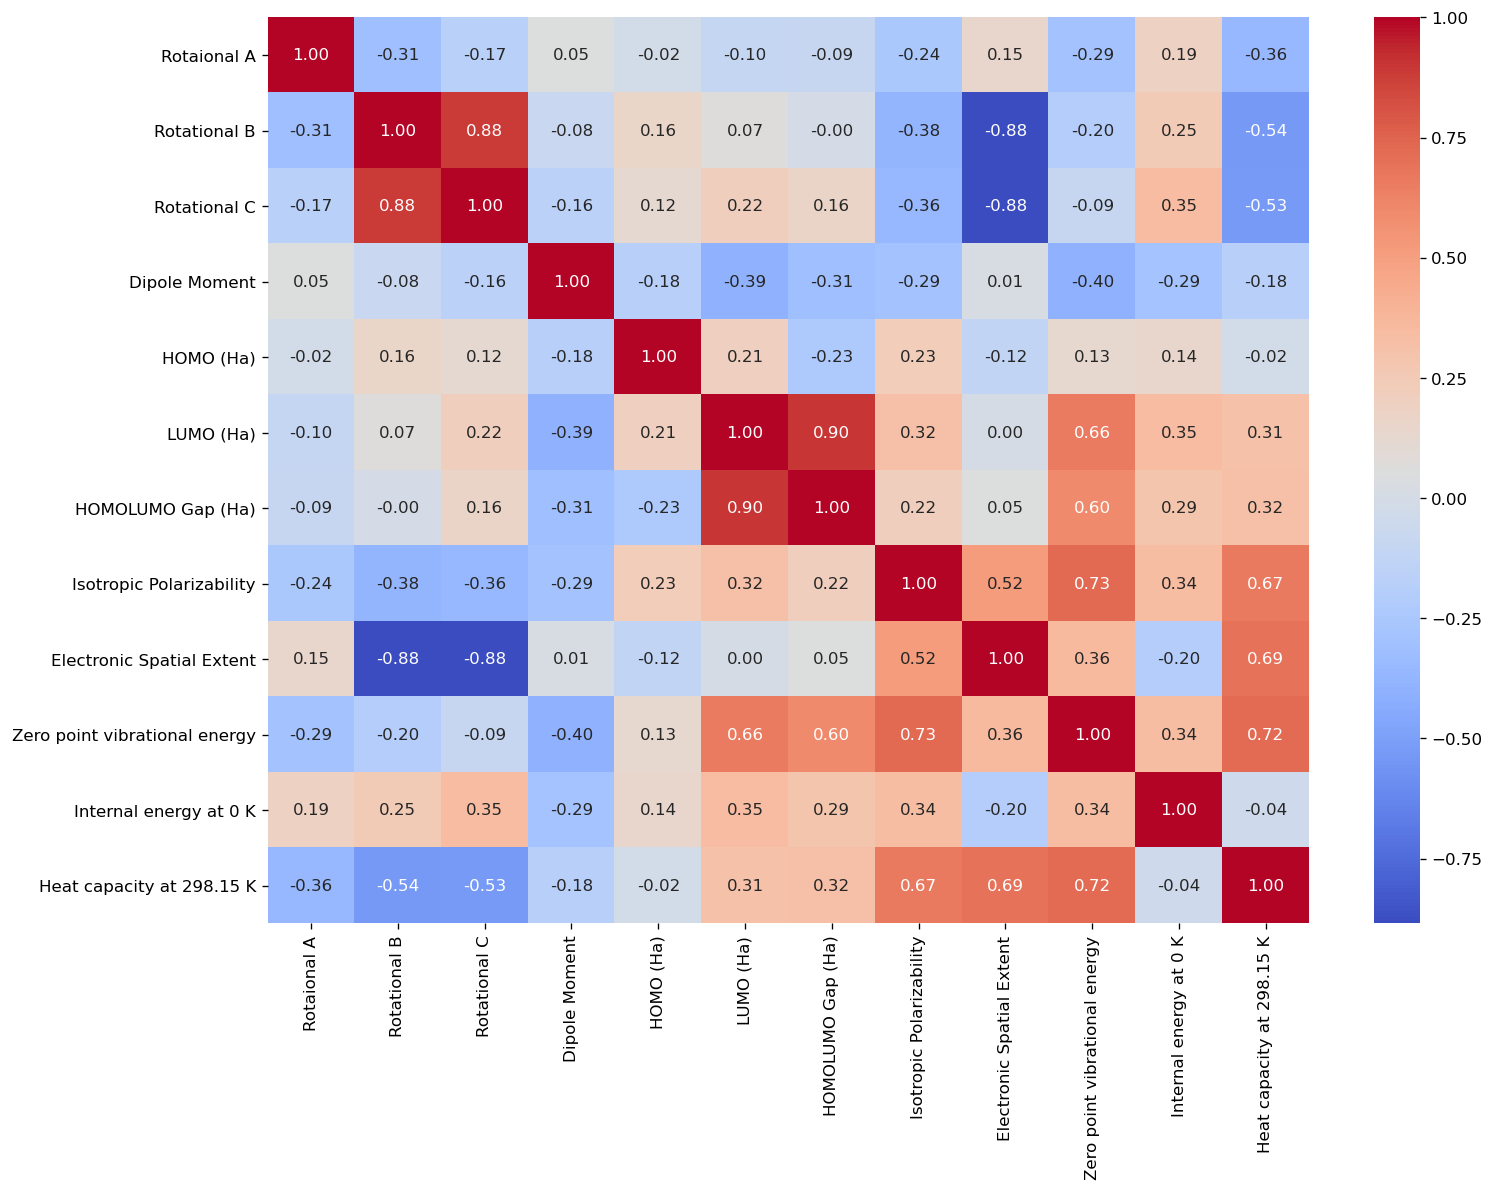

In [ ]:
all_df_corr = all_df.corr()

fig,ax = plt.subplots(figsize=(14, 10), dpi=120)
sns.heatmap(all_df_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

#### Boxenplot

In [ ]:
ax = start_plot(figsize=(12, 8))
sns.boxenplot(data=std_all_df)
ax.tick_params(axis='x', rotation = 80)

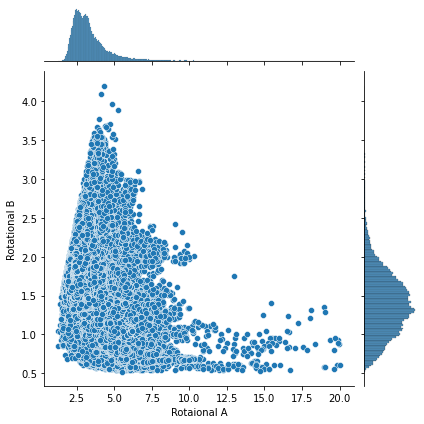

In [ ]:
sns.jointplot(y='Rotational B', x = 'Rotaional A', data = all_df)

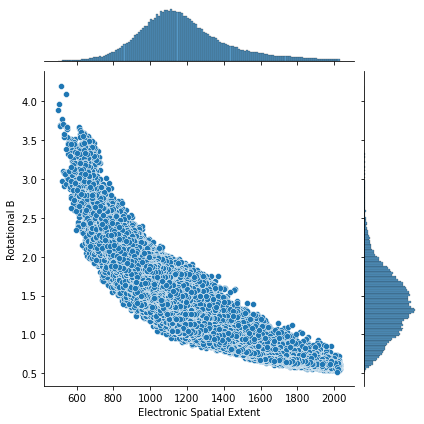

In [ ]:
sns.jointplot(y='Rotational B', x = 'Electronic Spatial Extent', data = all_df)

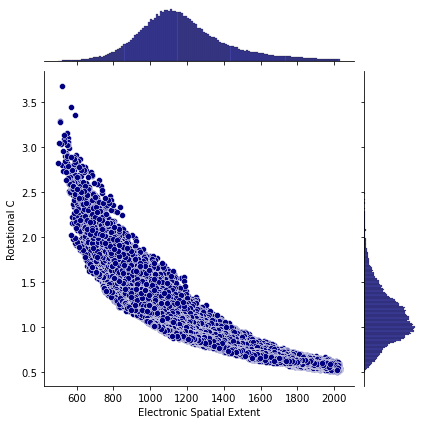

In [ ]:
sns.jointplot(y='Rotational C', x = 'Electronic Spatial Extent', data = all_df, color='navy')

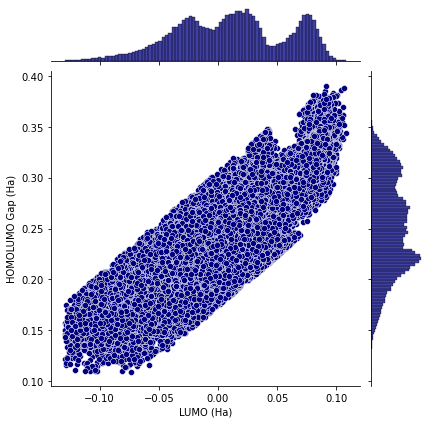

In [ ]:
sns.jointplot(y='HOMOLUMO Gap (Ha)', x = 'LUMO (Ha)', data = all_df, color='navy')

#### Scatter cmap

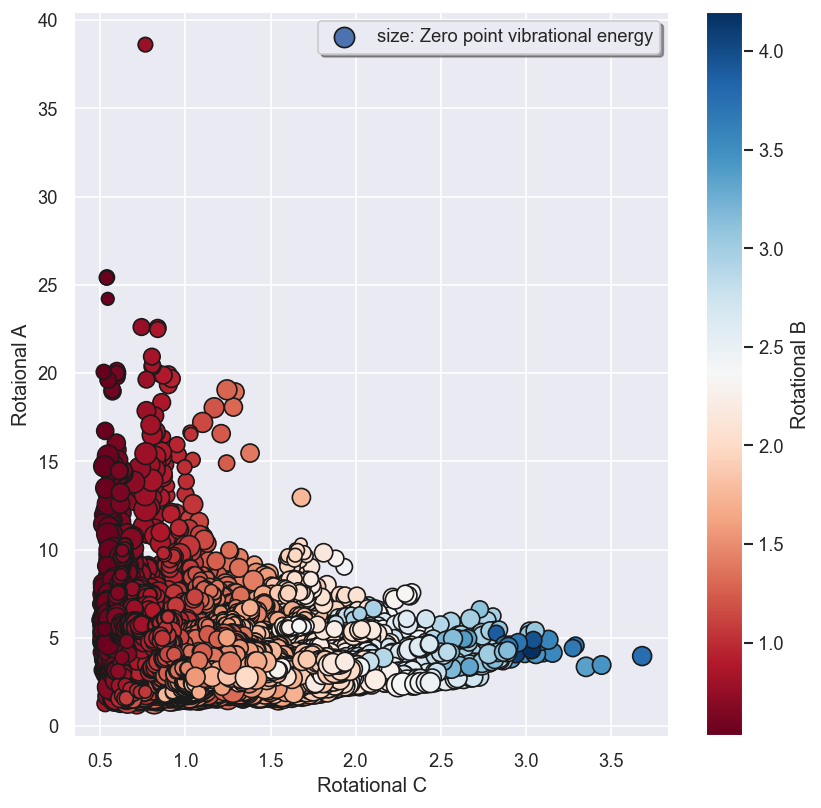

In [ ]:
ax = start_plot(figsize=(8, 8), style='darkgrid', dpi=120)

Y = 'Rotaional A'
S = 'Zero point vibrational energy'
X = 'Rotational C'
C = 'Rotational B'

scatter_plot = ax.scatter(all_df[X], all_df[Y],
                c=all_df[C], cmap = 'RdBu', edgecolor='k',
                s=all_df[S] * 1000, label='size: %s' % S)
plt.colorbar(scatter_plot, ax=ax, label=C)
ax.set_xlabel(X)
ax.set_ylabel(Y)

ax.legend(shadow=True)

In [ ]:
all_df[all_df['Dipole Moment'] == 0]

SMILES  Rotaional A  Rotational B  Rotational C  \
797        CC(=NO)C(C)=NO      4.37128       1.22630       0.96903   
4566      CC1=CN=C(C)C=N1      5.71748       1.52122       1.21964   
4592      OC1=CN=C(O)C=N1      5.99099       1.59854       1.26185   
5660      O1C=CC2=C1C=CO2      5.39952       2.25391       1.59014   
5812     CC(C)(O)C(C)(C)O      2.41059       1.75904       1.72898   
5813     CC1(C)CC(C)(C)C1      3.18477       1.53276       1.28432   
6103         CC(C)CCC(C)C      3.84575       0.84947       0.73294   
8797       CCC(=O)C(=O)CC      4.95896       1.08528       0.91009   
8955         COC(C)C(C)OC      3.64006       1.20499       0.96668   
17344        CC1CC1C1CC1C      3.94264       1.22792       1.04183   
17953      C1=CC=CC=CC=C1      2.69470       2.69469       1.50588   
18097      C1CC2=CCCC2=C1      4.41562       1.89578       1.37085   
18936      C1C2CC3CC2CC13      3.00014       3.00012       2.36572   
18939      C1C2OC3CC2OC13      3.25424       3.20866       2.49205   
19089      C1C2CC1C1CC2C1      3.53012       2.36261       2.30126   
19091      C1C2OC1C1CC2O1      3.76969       2.57203       2.45296   
19115  C12C3C4C1C1C2C3C41      3.35378       3.35354       3.35350   
19741    C1=CC2C3C=CC2C13      5.22882       2.12612       2.12611   
19744      C1CC2C3CCC2C13      4.39764       1.94412       1.94411   
23714     FC1=CC=C(F)C=C1      5.67875       1.42772       1.14089   
23719     FC1=CN=C(F)C=N1      6.08537       1.52794       1.22129   
38321   C1C2CC1C21C2CC1C2      3.67470       1.42990       1.42990   

       Dipole Moment  HOMO (Ha)  LUMO (Ha)  HOMOLUMO Gap (Ha)  \
797              0.0    -0.2278    -0.0326             0.1952   
4566             0.0    -0.2389    -0.0433             0.1956   
4592             0.0    -0.2248    -0.0488             0.1760   
5660             0.0    -0.2031    -0.0023             0.2008   
5812             0.0    -0.2567     0.0675             0.3242   
5813             0.0    -0.2712     0.0731             0.3443   
6103             0.0    -0.2964     0.0826             0.3790   
8797             0.0    -0.2370    -0.0791             0.1578   
8955             0.0    -0.2484     0.0901             0.3385   
17344            0.0    -0.2392     0.0899             0.3292   
17953            0.0    -0.2046    -0.0464             0.1583   
18097            0.0    -0.1942     0.0023             0.1965   
18936            0.0    -0.2775     0.0974             0.3749   
18939            0.0    -0.2358     0.0993             0.3351   
19089            0.0    -0.2701     0.0900             0.3600   
19091            0.0    -0.2222     0.0545             0.2767   
19115            0.0    -0.2559     0.0755             0.3314   
19741            0.0    -0.2187    -0.0206             0.1981   
19744            0.0    -0.2725     0.0940             0.3664   
23714            0.0    -0.2396    -0.0203             0.2192   
23719            0.0    -0.2722    -0.0708             0.2015   
38321            0.0    -0.2812     0.1069             0.3881   

       Isotropic Polarizability  Electronic Spatial Extent  \
797                       71.35                  1148.5611   
4566                      75.17                   991.7160   
4592                      60.41                   866.3994   
5660                      61.77                   723.0864   
5812                      73.74                   976.1461   
5813                      85.11                  1112.9368   
6103                      89.43                  1680.6032   
8797                      68.99                  1297.4930   
8955                      75.76                  1282.2059   
17344                     83.25                  1229.2093   
17953                     80.60                   845.6884   
18097                     82.93                   915.9860   
18936                     76.22                   725.6712   
18939                     62.05             

In [ ]:
all_df[all_df['HOMO (Ha)'] == all_df['HOMO (Ha)'].max()]

SMILES  Rotaional A  Rotational B  Rotational C  \
4927      COC1=CNC(N)=C1      6.71326       1.24499       1.06112   
27270    OC1=C2CCOC2=CN1      3.27036       1.51537       1.05270   
30013    CN1C=CC2=C1CCO2      3.15117       1.57475       1.07421   
31063  CNC1=C(O)OC(C)=C1      2.51405       1.28438       0.87555   
31072  COC1=C(C)NC(O)=N1      2.26511       1.48254       0.90624   
31146    CNC1=C(O)NC=C1C      1.92594       1.76978       0.98009   
31515  CCC1=CC(O)=C(N)N1      3.17159       1.04135       0.83627   
31610    CN1C=C(N)C=C1CO      2.34914       1.30288       0.85626   
31725    CNC1=CC(OC)=CO1      6.15644       0.85235       0.76208   
32442    CNC1=COC(O)=C1N      3.18207       1.21374       0.89057   
32917    CCNC1=CC=C(N)O1      4.06772       0.88625       0.74658   

       Dipole Moment  HOMO (Ha)  LUMO (Ha)  HOMOLUMO Gap (Ha)  \
4927          1.8206    -0.1736     0.0578             0.2314   
27270         2.1273    -0.1736     0.0605             0.2341   
30013         3.0641    -0.1736     0.0423             0.2160   
31063         0.5963    -0.1736     0.0338             0.2074   
31072         1.3243    -0.1736     0.0559             0.2296   
31146         0.3871    -0.1736     0.0668             0.2404   
31515         0.7584    -0.1736     0.0525             0.2262   
31610         2.4757    -0.1736     0.0427             0.2163   
31725         1.0215    -0.1736     0.0495             0.2231   
32442         0.4524    -0.1736     0.0531             0.2267   
32917         2.0274    -0.1736     0.0407             0.2143   

       Isotropic Polarizability  Electronic Spatial Extent  \
4927                      68.58                  1085.4893   
27270                     71.44                  1076.4368   
30013                     79.60                  1106.4656   
31063                     77.69                  1329.5892   
31072                     73.08                  1253.9094   
31146                     79.08                  1220.5991   
31515                     80.55                  1408.3439   
31610                     81.09                  1338.5287   
31725                     77.64                  1496.5221   
32442                     72.26                  1268.3911   
32917                     81.95                  1541.6697   

       Zero point vibrational energy  Internal energy at 0 K  \
4927                        0.131327             -379.936110   
27270                       0.126238             -437.905934   
30013                       0.149814             -401.969705   
31063                       0.146466             -439.105451   
31072                       0.135526             -455.185322   
31146                       0.159417             -419.233092   
31515                       0.159218             -419.240225   
31610                       0.159624             -419.225837   
31725                       0.147169             -439.090058   
32442                       0.135753             -455.150371   
32917                       0.159598             -419.228749   

       Heat capacity at 298.15 K  
4927                      30.066  
27270                     29.692  
30013                     29.809  
31063                     34.447  
31072                     33.374  
31146                     35.523  
31515                     36.254  
31610                     35.381  
31725                     33.385  
32442                     34.480  
32917                     34.446

# Multitask for GDB properties

## 針對每個性質，找出其特徵

In [ ]:
k_cols

['SMILES',
 'Rotaional A',
 'Rotational B',
 'Rotational C',
 'Dipole Moment',
 'HOMO (Ha)',
 'LUMO (Ha)',
 'HOMOLUMO Gap (Ha)',
 'Isotropic Polarizability',
 'Electronic Spatial Extent',
 'Zero point vibrational energy',
 'Internal energy at 0 K',
 'Heat capacity at 298.15 K']

In [ ]:
from scipy.stats import shapiro, jarque_bera
from scipy.stats import kurtosis, skew

def get_hist_val(prop, bins=1000):
    hist = pd.cut(all_df[prop], bins=bins)
    hist_val = all_df.groupby(hist)[prop].mean()
    hist_val = hist_val.fillna(0)
    return hist_val

def plot_hist_val(prop, bins=1000):
    hist = pd.cut(all_df[prop], bins=bins)
    hist_size = all_df.groupby(hist)[prop].size()
    ax = start_plot()
    ax.plot(hist_size)

def get_test(prop, bins=1000):
    stats = shapiro(get_hist_val(prop, bins=bins))
    return stats
# plot_hist_val(k_cols[1])
# get_test(k_cols[4], bins=1000)
# val = get_hist_val(k_cols[3])

shap = []

for i in k_cols[1:]:
    stats = get_test(i, bins=1000)
    shap.append(stats[0])

shap

[0.6798452138900757,
 0.942913293838501,
 0.9145616292953491,
 0.9548159837722778,
 0.9548236131668091,
 0.9579108357429504,
 0.9529603719711304,
 0.9040752649307251,
 0.9663410782814026,
 0.9666399359703064,
 0.7266709804534912,
 0.9461811780929565]

In [ ]:
feat_df = pd.DataFrame()


## coefficient of variance
cv_form = lambda x: x.std() / x.mean()
c_v = all_df.select_dtypes(np.number).apply(cv_form)
ku = all_df.select_dtypes(np.number).apply(kurtosis)
sk = all_df.select_dtypes(np.number).apply(skew)

feat_df['cv'] = c_v
feat_df['kurtosis'] = ku
feat_df['skewness'] = sk
feat_df['shapiro_test'] = shap

# feat_df = feat_df.iloc[1:, :]

## Hierarchy Agglomerative clustering

In [ ]:
feat_df

cv   kurtosis  skewness  shapiro_test
Rotaional A                    0.357232  25.761493  2.974318      0.679845
Rotational B                   0.289798   1.035888  0.575679      0.942913
Rotational C                   0.261142   1.847056  0.891150      0.914562
Dipole Moment                  0.521203  -0.190480  0.516381      0.954816
HOMO (Ha)                     -0.084925   0.693541  0.270559      0.954824
LUMO (Ha)                      4.141740  -0.648035 -0.142177      0.957911
HOMOLUMO Gap (Ha)              0.185445  -0.720829 -0.007731      0.952960
Isotropic Polarizability       0.099049   0.066432 -0.180143      0.904075
Electronic Spatial Extent      0.202134   0.852310  0.761325      0.966341
Zero point vibrational energy  0.213650  -0.254277  0.020589      0.966640
Internal energy at 0 K        -0.089210   0.020497  0.187560      0.726671
Heat capacity at 298.15 K      0.121020  -0.109832  0.062943      0.946181

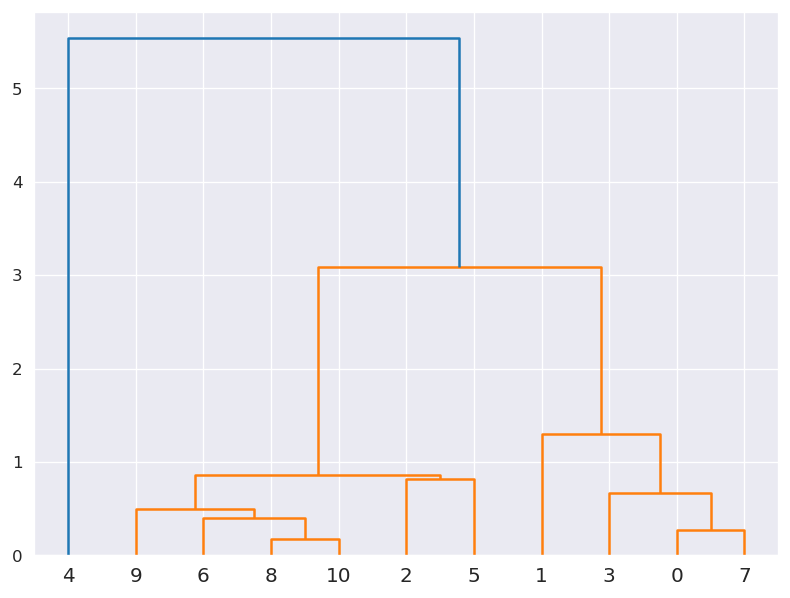

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cut_tree, linkage

hc = sch.linkage(feat_df[1:].values, method='ward')
ax = start_plot(style='darkgrid', figsize=(8, 6), dpi=120)
dendrogram = sch.dendrogram(hc, ax=ax)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

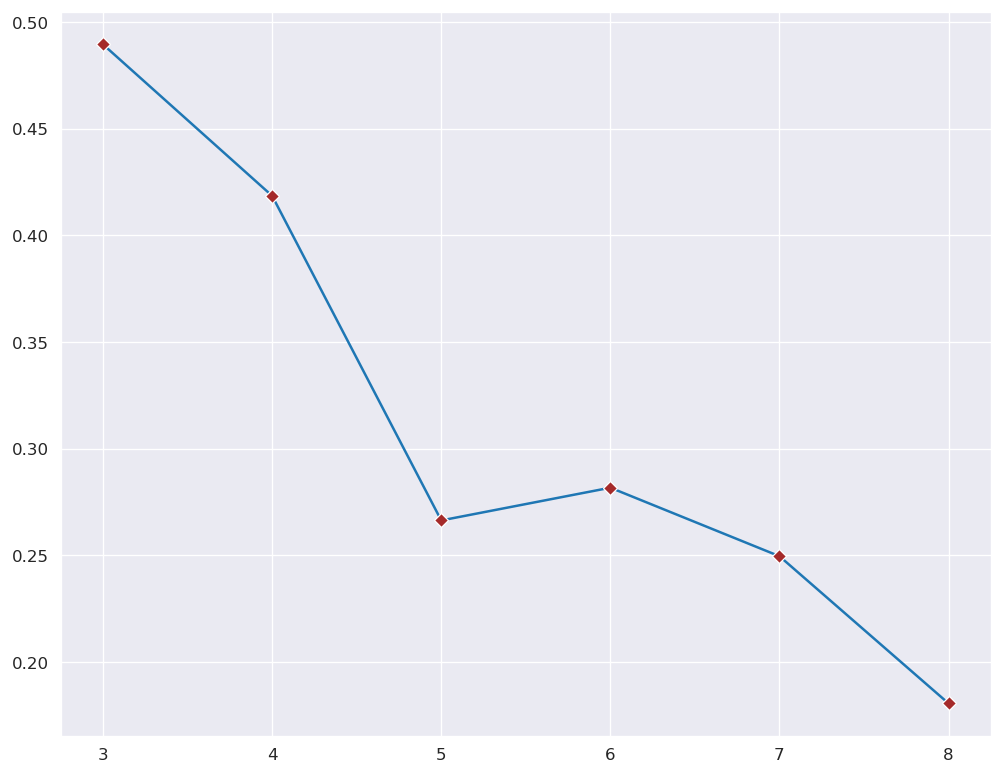

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
range_k = range(3, 9)
savg = []

for n in range_k:
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = model.fit_predict(feat_df.values[1:])
    sil_avg = silhouette_score(feat_df.values[1:], labels)
    savg.append(sil_avg)

ax = start_plot(style='darkgrid')
sns.lineplot(range_k, savg, marker='D', mfc='brown')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_k = 5
model = AgglomerativeClustering(n_clusters=n_k, linkage='ward')
model.fit(feat_df[1:].values)
labels = model.labels_

df = feat_df.copy()
df.loc[1:, 'labels'] = labels
df

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  if __name__ == '__main__':


cv   kurtosis  skewness  shapiro_test  \
Rotaional A                    0.357232  25.761493  2.974318      0.679845   
Rotational B                   0.289798   1.035888  0.575679      0.942913   
Rotational C                   0.261142   1.847056  0.891150      0.914562   
Dipole Moment                  0.521203  -0.190480  0.516381      0.954816   
HOMO (Ha)                     -0.084925   0.693541  0.270559      0.954824   
LUMO (Ha)                      4.141740  -0.648035 -0.142177      0.957911   
HOMOLUMO Gap (Ha)              0.185445  -0.720829 -0.007731      0.952960   
Isotropic Polarizability       0.099049   0.066432 -0.180143      0.904075   
Electronic Spatial Extent      0.202134   0.852310  0.761325      0.966341   
Zero point vibrational energy  0.213650  -0.254277  0.020589      0.966640   
Internal energy at 0 K        -0.089210   0.020497  0.187560      0.726671   
Heat capacity at 298.15 K      0.121020  -0.109832  0.062943      0.946181   

                               labels  
Rotaional A                       NaN  
Rotational B                      2.0  
Rotational C                      3.0  
Dipole Moment                     0.0  
HOMO (Ha)                         2.0  
LUMO (Ha)                         4.0  
HOMOLUMO Gap (Ha)                 0.0  
Isotropic Polarizability          1.0  
Electronic Spatial Extent         2.0  
Zero point vibrational energy     1.0  
Internal energy at 0 K            1.0  
Heat capacity at 298.15 K         1.0

In [ ]:
labels

array([2, 3, 0, 2, 4, 0, 1, 2, 1, 1, 1], dtype=int64)

rotational A 視為離群值

rotational B, HOMO, ESE 同一群

rotational C

LUMO

Dipole Moment, HOMOLUMO Gap 一群

Isotropic, vibrational, Internal energy, Heat capacity同一群 


## HSPiP HOMO as auxiliary dataset

In [ ]:
import pandas as pd
import numpy as np

HSPiP = pd.read_csv(dres, index_col=None)
HSPiP.head()

Chemical       CAS           smiles HSPiP_indx  good_smiles  \
0  Acetaldehyde   75-07-0             CC=O          0         True   
1  Acetaldoxime  107-29-9          C/C=N/O          1         True   
2     Acetamide   60-35-5          CC(N)=O          2         True   
3   Acetanilide  103-84-4  CC(=O)Nc1ccccc1          3         True   
4   Acetic Acid   64-19-7          CC(=O)O          4         True   

   single_frag  duplicated  sanity    label  organic  ...     Hbd  Volume  \
0         True        True    True  hspip_0     True  ...  0.0000  0.0641   
1         True        True    True  hspip_1     True  ...  3.9919  0.0806   
2         True        True    True  hspip_2     True  ...  1.4629  0.0802   
3         True        True    True  hspip_3     True  ...  1.4190  0.1741   
4         True        True    True  hspip_4     True  ...  4.9479  0.0756   

   sigma_mom_0  sigma_mom_1 sigma_mom_2  sigma_mom_3  sigma_mom_4 sigma_mom_5  \
0            0         33.0   18.400000         30.6         30.1        39.1   
1            0         61.4   -9.251615        122.0        -62.6       324.0   
2            0         73.0   20.900000        117.0         55.5       221.0   
3            0         71.4   13.700000         87.4         24.6       158.0   
4            0         79.2  -12.800000        153.0       -110.0       411.0   

   sigma_norm                                      sigma_profile  
0   22.203331  [  0.00000000e+00   0.00000000e+00   0.0000000...  
1   21.885302  [ 0.          0.          0.          0.      ...  
2   19.349175  [ 0.          0.          0.          0.      ...  
3   40.872215  [ 0.          0.          0.          0.      ...  
4   19.380647  [ 0.          0.          0.          0.      ...  

[5 rows x 35 columns]

In [ ]:
prop_name = 'homo'
gdb_prop_name = 'HOMO (Ha)'

if prop_name == 'homo':
    string = HSPiP[HSPiP['homo'] == 'True']
    missing_ = string['lumo'].values - string['gap'].values
    HSPiP['homo'].replace(['True'], missing_, inplace=True)
    HSPiP['homo'] = HSPiP['homo'].astype(np.float)

df_smiles_50 = HSPiP[HSPiP['smiles'].str.len() < 50]
print('SMILES with length < 50 : %s molecules' % len(df_smiles_50))

SMILES with length < 50 : 8627 molecules


<AxesSubplot:xlabel='homo', ylabel='Count'>

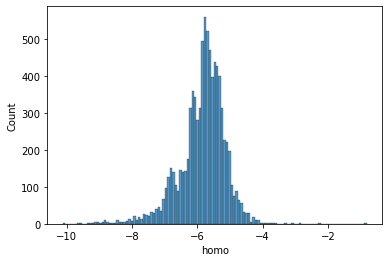

In [ ]:
sns.histplot(df_smiles_50['homo'])

In [ ]:
cdf = df_smiles_50[['smiles', prop_name]]
up = cdf[prop_name] > cdf[prop_name].mean() + 3 * cdf[prop_name].std()
low = cdf[prop_name] < cdf[prop_name].mean() - 3 * cdf[prop_name].std()
cdf.drop(list(cdf[up].index) + list(cdf[low].index), axis=0, inplace=True)
print('SMILES with HOMO no outliers : %s molecules' % len(cdf))

SMILES with HOMO no outliers : 8506 molecules


C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cdf.head()

smiles      homo
0             CC=O -5.762800
1          C/C=N/O -5.696295
2          CC(N)=O -5.665846
3  CC(=O)Nc1ccccc1 -5.523884
4          CC(=O)O -6.314021

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

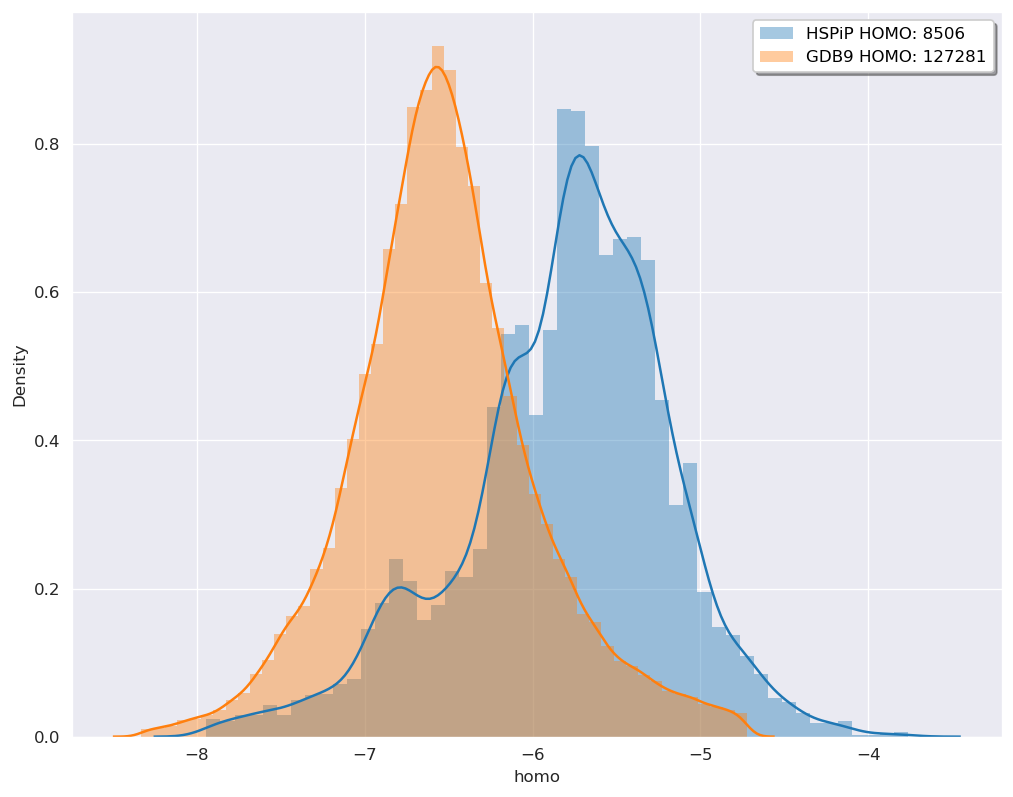

In [ ]:
from sklearn.preprocessing import StandardScaler

tdf = all_df[['SMILES', 'HOMO (Ha)']]
tdf['HOMO (eV)'] = tdf['HOMO (Ha)'] * 27.211
tdf.drop(['HOMO (Ha)'], axis=1, inplace=True)
tdf.rename(columns={'SMILES': 'smiles', 'HOMO (eV)': 'homo'}, inplace=True)

ax = start_plot(style='darkgrid')

sns.distplot(cdf['homo'], label='HSPiP HOMO: %d' % len(cdf))
sns.distplot(tdf['homo'], label='GDB9 HOMO: %d' % len(tdf))
ax.legend(shadow=True)

In [ ]:
## map GDB9 dataset=1; HSPiP dataset=0

tdf['class'] = np.ones([len(tdf), 1])
cdf['class'] = np.zeros([len(cdf), 1])

homo_df = pd.concat([tdf, cdf], axis=0)
homo_df

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


smiles      homo  class
226                                     CC(C)(O)CO -7.126561    1.0
256                                      CC(C)OC=O -7.477583    1.0
263                                      CCNC(N)=O -6.604110    1.0
264                                      CCOC(C)=O -7.221799    1.0
267                                      COCC(C)=O -6.663974    1.0
...                                            ...       ...    ...
8844                        Clc1cccc(N2CCNCC2)c1Cl -4.691025    0.0
8845                     O=C1CCc2ccc(OCCCCCl)cc2N1 -5.055195    0.0
8846                     O=C1CCc2ccc(OCCCCBr)cc2N1 -5.150163    0.0
8847                           O=C1CCc2ccc(O)cc2N1 -5.067712    0.0
8848  O=C1CCc2ccc(OCCCCOc3ccc4c(c3)NC(=O)CC4)cc2N1 -4.995031    0.0

[135787 rows x 3 columns]

overlap molecules 要屬於class 1 還是 class 0

In [ ]:
import torch as th
import numpy as np

##自己寫一組strattified sampler

class Sampler(object):
    """Base class for all Samplers.
    Every Sampler subclass has to provide an __iter__ method, providing a way
    to iterate over indices of dataset elements, and a __len__ method that
    returns the length of the returned iterators.
    """

    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError


class StratifiedSampler(Sampler):
    """Stratified Sampling
    Provides equal representation of target classes in each batch
    """

    def __init__(self, class_vector, batch_size):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        batch_size : integer
            batch_size
        """
        self.n_splits = int(class_vector.size(0) / batch_size)
        self.class_vector = class_vector

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
        except:
            print('Need scikit-learn for this functionality')
        s = StratifiedKFold(n_splits=self.n_splits)
        X = th.randn(self.class_vector.size(0), 2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return np.hstack([train_index, test_index])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)

class StratifiedBatchSampler:
    """Stratified batch sampling
    Provides equal representation of target classes in each batch
    """
    def __init__(self, y, batch_size, shuffle=True):
        if torch.is_tensor(y):
            y = y.numpy()
        assert len(y.shape) == 1, 'label array must be 1D'
        n_batches = int(len(y) / batch_size)
        self.skf = StratifiedKFold(n_splits=n_batches, shuffle=shuffle)
        self.X = torch.randn(n_batches * batch_size, 1).numpy()
        self.y = y[-n_batches * batch_size:]
        self.shuffle = shuffle

    def __iter__(self):
        if self.shuffle:
            self.skf.random_state = torch.randint(0,int(1e8),size=()).item()
        for train_idx, test_idx in self.skf.split(self.X, self.y):
            yield test_idx

    def __len__(self):
        return len(self.y)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, item):
        return self.X[item], self.y[item]

In [ ]:
device = torch.device("cuda")

X = homo_df[['smiles', 'homo']]
y = homo_df['class']

bs = 512

data_loader = DataLoader(dataset=Data(torch.from_numpy(X['homo'].values), torch.from_numpy(y.values)),
             batch_sampler=StratifiedBatchSampler(torch.from_numpy(y.values), bs)
             )
'batch sampler cannot be mutually exclusive with droplast, batchsize, and shuffle arguments'

n_batches = (int(len(X)) // bs)
print(len(cdf) / n_batches)

f = 0
for i, (a, b) in enumerate(data_loader):
    if i % 10 == 0:
        k = int(sum(b))

32.09811320754717


In [ ]:
sum(y.values) / len(y.values)

0.9373577735718441

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X['homo'].values, y.values,
               test_size=0.1, stratify=y.values)

In [ ]:
np.sum(ytest) / len(ytest), np.sum(ytrain) / len(ytrain)

(0.9373297002724795, 0.9373608929039016)